In [1]:
# On importe les modules 

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
from pivottablejs import pivot_ui
import seaborn as sns
%matplotlib inline

In [2]:
# On importe les fichiers .csv
clients=pd.read_csv("G:\BigData\CRosemont\Programmation 2\Travail pratique 1\Data\clients.csv")

In [3]:
prestations=pd.read_csv("G:\BigData\CRosemont\Programmation 2\Travail pratique 1\Data\prestations.csv")

In [4]:
gyms=pd.read_csv("G:\BigData\CRosemont\Programmation 2\Travail pratique 1\Data\gyms.csv")

In [5]:
opinions=pd.read_csv("G:\BigData\CRosemont\Programmation 2\Travail pratique 1\Data\opinions.csv")

In [6]:
recommendations=pd.read_csv(r"G:\BigData\CRosemont\Programmation 2\Travail pratique 1\Data\recommendations.csv")

In [7]:
frequentations=pd.read_csv(r"G:\BigData\CRosemont\Programmation 2\Travail pratique 1\Data\frequentations.csv")

In [8]:
# On va bcp se servir de la colonne de noms, donc on va creer un DF appart pour les noms
nom_gym=gyms.drop(columns=["moyenne_votes", "ville", "quartier", "reputation"], axis=1)

In [9]:
frequentations["date"] = pd.to_datetime(frequentations["date"], format='%Y-%m-%d')
frequentations['annee'] = frequentations.date.dt.year

In [10]:
opinions["date"] = pd.to_datetime(opinions["date"], format='%Y-%m-%d')
opinions['annee'] = opinions.date.dt.year

In [11]:
recommendations["date"] = pd.to_datetime(recommendations["date"], format='%Y-%m-%d')
recommendations['annee'] = recommendations.date.dt.year

In [12]:
caracteristiques = gyms[['gym_id', 'moyenne_votes', 'ville', 'quartier']].copy()

In [13]:
# On a 34268 valeurs dans la colonne "gym_id"
print(caracteristiques["gym_id"].value_counts().sum())

34268


In [14]:
# On a de doublons
print(caracteristiques["gym_id"].nunique())

33833


In [15]:
# On efface les doublons
caracteristiques = caracteristiques.drop_duplicates(subset=["gym_id"])

In [16]:
# On verifie si on a encore de doublons dans la colonne "gym_id"
caracteristiques["gym_id"].duplicated().sum()

0

In [17]:
# On affirme qu'on a 33833 gyms dans notre bas de données
print(caracteristiques["gym_id"].value_counts().sum())

33833


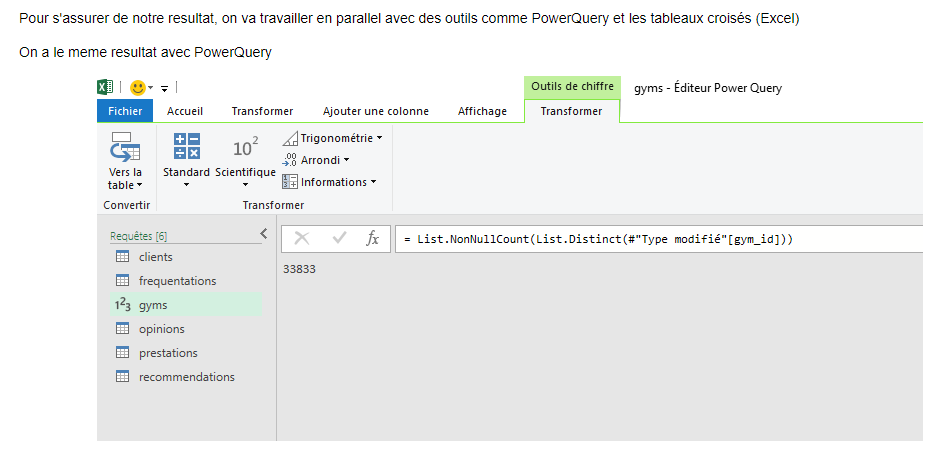

In [18]:
caracteristiques

,gym_id,moyenne_votes,ville,quartier
0,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110
1,pd0v6sOqpLhFJ7mkpIaixw,4.0,Phoenix,85004
2,0vhi__HtC2L4-vScgDFdFw,3.5,Calgary,T2T
3,t65yfB9v9fqlhAkLnnUXdg,3.5,Toronto,M5A
4,i7_JPit-2kAbtRTLkic2jA,4.0,Toronto,M5H
...,...,...,...,...
34263,cjZfgcQwA6KmQ_ANWKN2aw,3.5,McMurray,15317
34264,Hq2edcOTjse7wjK2CwBijQ,3.5,Pointe-Claire,H9S
34265,7KlpgRjjAmVabPzxcExs0g,4.0,Phoenix,85051
34266,0fY-zYyP2fDmp2YXFsuNTg,4.0,Sun Prairie,53590


# Question 1

**Le nombre de gyms dans le quartier associée au gym en question.**

In [19]:
# Voir le nom de colonnes du fichier .csv
for col in gyms.columns:
    print(col)

gym_id
nom
moyenne_votes
ville
quartier
reputation


In [20]:
# Pour ne pas modifier le csv original, on va faire une copie et 
# on va importer seulement les colonnes qu'on a besoin pour repondre a la question.
gyms_col = gyms[["gym_id","quartier"]]
    # On extrait les colonnes gym_id et quartier dans une variable
gyms_mod = gyms_col.copy(deep=True)
    # On fait une copie. Toute modification des données de la copie ne sera pas reflétée 
    # dans la copie originale (et vice versa).

In [21]:
# On a 34268 valeurs dans la colonne "gym_id"
print(gyms_mod["gym_id"].value_counts().sum())

34268


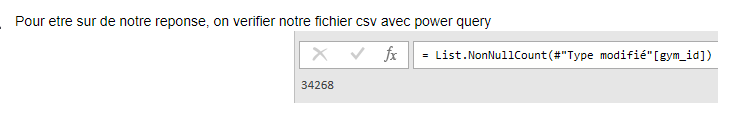

In [22]:
# On a 33833 valeurs uniques dans la colonne "gym_id"
# Possiblement, on a le meme gym dans plusieurs quartiers
print(gyms_mod["gym_id"].nunique())

33833


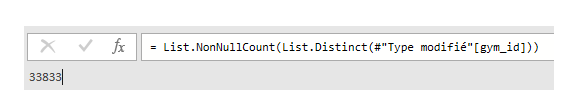

In [23]:
# On remarque qu'il manque 67 valeurs dans la colonne "quartier"
gyms_mod.isna().sum()

gym_id       0
quartier    67
dtype: int64

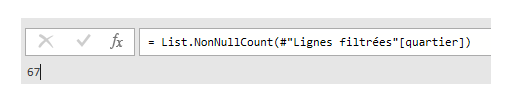

In [24]:
# Grace a la propriété .shape, on peut voir la quantité des valeurs (incluant NA)
print(gyms_mod["quartier"].shape)

(34268,)


In [25]:
# On s'assure qu'on a la bonne quantité de valeurs NA 
# .value_counts() ne compte pas les NA (34268 - 34201 = 67 NA)
print(gyms_mod["quartier"].value_counts().sum())

34201


In [26]:
# On efface les doublons
gyms_mod = gyms_mod.drop_duplicates(subset=["gym_id"])

In [27]:
# Étant donné qu'un quartier fait partie d'une ville, les quartiers qui manquent
# peuvent etre remplacé par le nom de leurs villes.
gyms_mod["quartier"].fillna(gyms.ville, inplace=True)

In [28]:
# On verifie si on a encore des valeurs NA
gyms_mod.isna().sum()

gym_id      0
quartier    0
dtype: int64

In [29]:
# On groupe les gyms_id selon le quartier 
gyms_mod=gyms_mod.groupby("quartier")["gym_id"].count().reset_index(name="nb_gyms_quartier")

In [30]:
gyms_mod

,quartier,nb_gyms_quartier
0,12919,1
1,12979,2
2,15003,8
3,15012,3
4,15017,32
...,...,...
987,T4B,23
988,TR12,1
989,Toronto,14
990,W8M,1


In [31]:
# On export notre nouvelle colonne dans le DF caracteristiques
caracteristiques = caracteristiques.merge(gyms_mod.astype(str), how='left', on=['quartier'])

In [32]:
#  On peut voir ici le nombre de gyms pour chaque quartier
caracteristiques

,gym_id,moyenne_votes,ville,quartier,nb_gyms_quartier
0,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,49
1,pd0v6sOqpLhFJ7mkpIaixw,4.0,Phoenix,85004,170
2,0vhi__HtC2L4-vScgDFdFw,3.5,Calgary,T2T,77
3,t65yfB9v9fqlhAkLnnUXdg,3.5,Toronto,M5A,121
4,i7_JPit-2kAbtRTLkic2jA,4.0,Toronto,M5H,96
...,...,...,...,...,...
33828,cjZfgcQwA6KmQ_ANWKN2aw,3.5,McMurray,15317,53
33829,Hq2edcOTjse7wjK2CwBijQ,3.5,Pointe-Claire,H9S,20
33830,7KlpgRjjAmVabPzxcExs0g,4.0,Phoenix,85051,71
33831,0fY-zYyP2fDmp2YXFsuNTg,4.0,Sun Prairie,53590,48


#### Methode 2 (sans importer le resultat dans le DF caracteristiques)

In [33]:
# Voir le nom de colonnes du fichier .csv
for col in gyms.columns:
    print(col)

gym_id
nom
moyenne_votes
ville
quartier
reputation


In [34]:
# Pour ne pas modifier le csv original, on va faire une copie et 
# on va importer seulement les colonnes qu'on a besoin pour repondre a la question.
gyms_col = gyms[["gym_id","quartier","ville"]]
    # On extrait les colonnes gym_id et quartier dans une variable
gyms_mod = gyms_col.copy(deep=True)
    # On fait une copie. Toute modification des données de la copie ne sera pas reflétée 
    # dans la copie originale (et vice versa).

In [35]:
# On a 34268 valeurs dans la colonne "gym_id"
print(gyms_mod["gym_id"].value_counts().sum())

34268


In [36]:
# On a 33833 valeurs uniques dans la colonne "gym_id"
# Possiblement, on a le meme gym dans plusieurs quartiers
print(gyms_mod["gym_id"].nunique())

33833


In [37]:
# On remarque qu'il manque 67 valeurs dans la colonne "quartier"
gyms_mod.isna().sum()

gym_id       0
quartier    67
ville        0
dtype: int64

In [38]:
# Grace a la propriété .shape, on peut voir la quantité des valeurs (incluant NA)
print(gyms_mod["quartier"].shape)

(34268,)


In [39]:
# On s'assure qu'on a la bonne quantité de valeurs NA 
# .value_counts() ne compte pas les NA (34268 - 34201 = 67 NA)
print(gyms_mod["quartier"].value_counts().sum())

34201


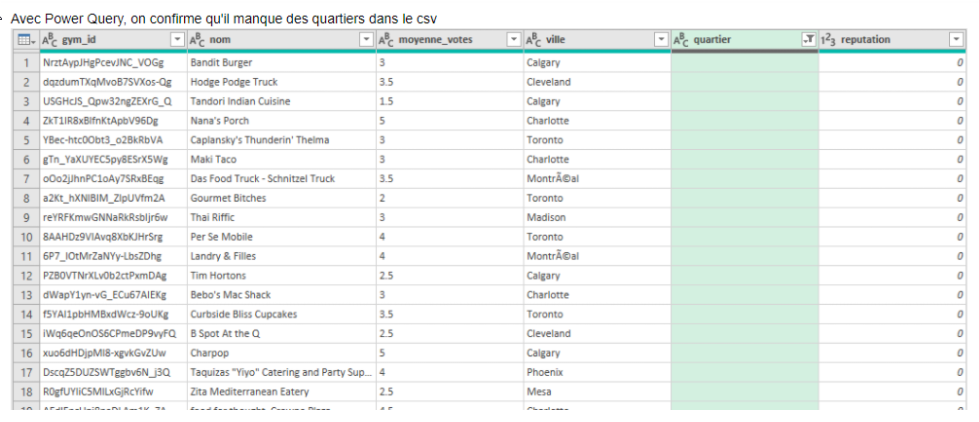

In [40]:
# Étant donné qu'un quartier fait partie d'une ville, les quartiers qui manquent
# peuvent etre remplacé par le nom de leurs villes.
gyms_mod["quartier"].fillna(gyms_mod.ville, inplace=True)

In [41]:
# On verifie si on a encore des valeurs NA
gyms_mod.isna().sum()

gym_id      0
quartier    0
ville       0
dtype: int64

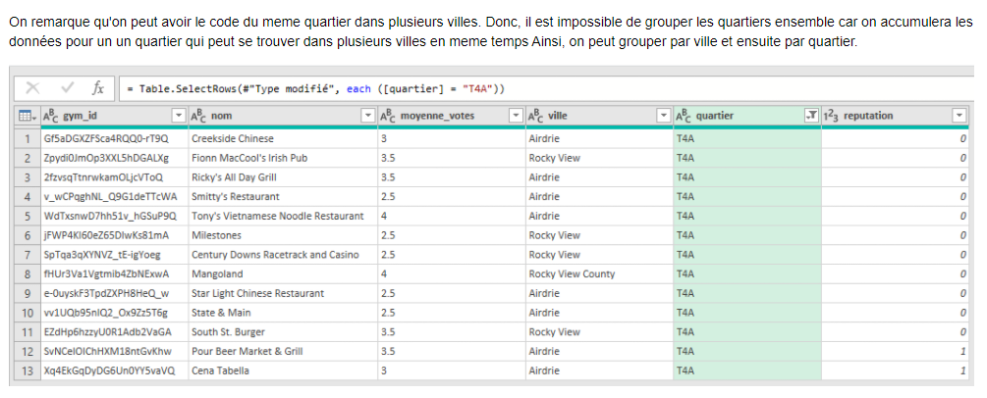

In [42]:
# On regroupe selon la ville et le quartier
gyms_mod=gyms_mod.groupby(["ville","quartier"])

In [43]:
# A l'aide de l'argument .shape on compte les gyms selon les quartiers
gyms_mod=gyms_mod.size().reset_index(name='nb_gyms_quartier')

In [44]:
gyms_mod

,ville,quartier,nb_gyms_quartier
0,AGINCOURT,M1W,1
1,Ahwatukee,85044,1
2,Ahwatukee,85048,1
3,Airdrie,T4A,8
4,Airdrie,T4B,23
...,...,...,...
1576,Youngtown,85363,6
1577,kirtland,44094,1
1578,south Euclid,44121,1
1579,springdale,15144,1


In [45]:
# On export le resultat dans un fichier excel 
gyms_mod.to_excel("Q1.xlsx")

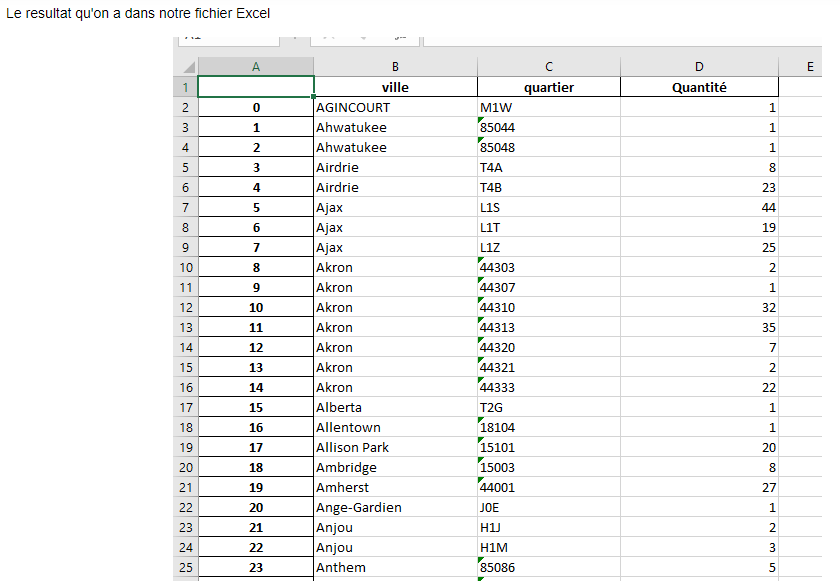

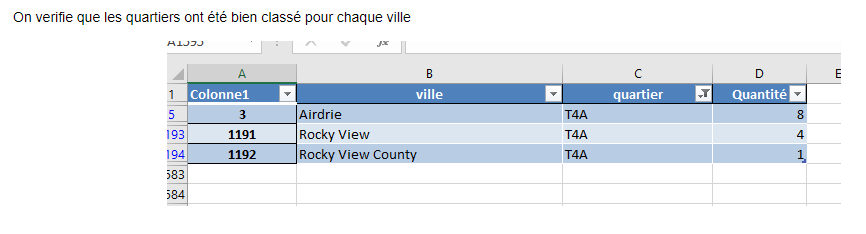

# Question 2

**Le nombre de 𝑔𝑦𝑚𝑠 qui ouvrent leurs portes dans la même année que le gym en question. On considère que la première année d'un gym correspond à l'année de la première publication d'une opinion sur ce gym.**

In [46]:
#On regroupe les gym_id selon l'année, on choisi seulement la date minimale et on donne le nom "nb_gyms_meme_annee"
que2 = opinions.groupby('gym_id')['annee'].min().reset_index(name='annee_ouverture')

In [47]:
que2['nb_gyms_meme_annee'] = que2['annee_ouverture'].map(que2['annee_ouverture'].value_counts())


In [48]:
caracteristiques = pd.merge(caracteristiques,que2, how='left', on=['gym_id'])

In [49]:
caracteristiques.drop('annee_ouverture', axis=1, inplace=True)

In [50]:
caracteristiques # Le resultat

,gym_id,moyenne_votes,ville,quartier,nb_gyms_quartier,nb_gyms_meme_annee
0,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,49,NaN
1,pd0v6sOqpLhFJ7mkpIaixw,4.0,Phoenix,85004,170,1395.0
2,0vhi__HtC2L4-vScgDFdFw,3.5,Calgary,T2T,77,NaN
3,t65yfB9v9fqlhAkLnnUXdg,3.5,Toronto,M5A,121,1803.0
4,i7_JPit-2kAbtRTLkic2jA,4.0,Toronto,M5H,96,1803.0
...,...,...,...,...,...,...
33828,cjZfgcQwA6KmQ_ANWKN2aw,3.5,McMurray,15317,53,NaN
33829,Hq2edcOTjse7wjK2CwBijQ,3.5,Pointe-Claire,H9S,20,NaN
33830,7KlpgRjjAmVabPzxcExs0g,4.0,Phoenix,85051,71,NaN
33831,0fY-zYyP2fDmp2YXFsuNTg,4.0,Sun Prairie,53590,48,NaN


# Question 3

**𝑒𝑐𝑎𝑟𝑡_𝑡𝑦𝑝𝑒_𝑣𝑜𝑡𝑒𝑠 : L'écart type de la moyenne des votes par année. Il faut estimer la moyenne des votes par années. Puis, calculer l'écart type sur ces valeurs.**

In [51]:
# Pour ne pas modifier le csv original, on va faire une copie et 
# on va importer seulement les colonnes qu'on a besoin pour repondre a la question.

opinions_modif = opinions[["gym_id","votes","date"]]
    # On extrait les colonnes gym_id et quartier dans une variable
opinions_modif = opinions_modif.copy(deep=True)
    # On fait une copie. Toute modification des données de la copie ne sera pas reflétée 
    # dans la copie originale (et vice versa).

In [52]:
opinions_modif

,gym_id,votes,date
0,ikCg8xy5JIg_NGPx-MSIDA,5,2018-01-09 20:56:00
1,zvO-PJCpNk4fgAVUnExYAA,1,2010-10-05 19:12:00
2,FxLfqxdYPA6Z85PFKaqLrg,4,2016-05-07 01:36:00
3,AakkkTuGZA2KBodKi2_u8A,1,2012-07-16 00:37:00
4,cHdJXLlKNWixBXpDwEGb_A,3,2015-04-01 16:30:00
...,...,...,...
1048570,#NOM?,3,2011-10-29 12:00:00
1048571,BjRi5W4tESsLRwVb85GIMQ,3,2016-08-26 05:29:00
1048572,06graki4XxJJJp5b8H9aGg,4,2011-10-31 13:26:00
1048573,uILn9EX0WW-AHL6lV8gupA,1,2018-03-17 02:30:00


In [53]:
# On remarque qu'il ne manque pas de valeurs
opinions_modif.isna().sum()

gym_id    0
votes     0
date      0
dtype: int64

In [54]:
# On va creer une autre colonne ou on va extraire la date pour chaque opinion
opinions_modif['Nouvelle_date'] = opinions_modif['date'].astype(str).str[:4]

In [55]:
# On verifie si on a la nouvelle colonne 'Nouvelle_date'
opinions_modif

,gym_id,votes,date,Nouvelle_date
0,ikCg8xy5JIg_NGPx-MSIDA,5,2018-01-09 20:56:00,2018
1,zvO-PJCpNk4fgAVUnExYAA,1,2010-10-05 19:12:00,2010
2,FxLfqxdYPA6Z85PFKaqLrg,4,2016-05-07 01:36:00,2016
3,AakkkTuGZA2KBodKi2_u8A,1,2012-07-16 00:37:00,2012
4,cHdJXLlKNWixBXpDwEGb_A,3,2015-04-01 16:30:00,2015
...,...,...,...,...
1048570,#NOM?,3,2011-10-29 12:00:00,2011
1048571,BjRi5W4tESsLRwVb85GIMQ,3,2016-08-26 05:29:00,2016
1048572,06graki4XxJJJp5b8H9aGg,4,2011-10-31 13:26:00,2011
1048573,uILn9EX0WW-AHL6lV8gupA,1,2018-03-17 02:30:00,2018


In [56]:
opinions_modif=opinions_modif.pivot_table(index=["Nouvelle_date"],values=["votes"], \
                                          aggfunc={"votes":[np.std,np.mean]}, fill_value=0)

In [57]:
opinions_modif # Le resultat

votes          
                   mean       std
Nouvelle_date                    
2004           3.000000  0.000000
2005           3.973684  0.961889
2006           3.753029  1.116177
2007           3.743056  1.094083
2008           3.657056  1.134378
2009           3.617321  1.172223
2010           3.621020  1.187766
2011           3.611187  1.236653
2012           3.592390  1.283743
2013           3.612825  1.308391
2014           3.654260  1.362361
2015           3.695646  1.395899
2016           3.724900  1.423479
2017           3.733164  1.441125
2018           3.770145  1.449139

# Question 4

**𝑛𝑏_𝑜𝑝𝑖𝑛𝑖𝑜𝑛𝑠 : Le nombre total d'opinions pour ce gym.**

In [58]:
# On fait une copie pour ne pas corrompre le fichier original
que4 = opinions[['opinion_id','gym_id']].copy()

In [59]:
que4 #On verifie notre dataframe 

,opinion_id,gym_id
0,yi0R0Ugj_xUx_Nek0-_Qig,ikCg8xy5JIg_NGPx-MSIDA
1,8e9HxxLjjqc9ez5ezzN7iQ,zvO-PJCpNk4fgAVUnExYAA
2,Z7wgXp98wYB57QdRY3HQ3w,FxLfqxdYPA6Z85PFKaqLrg
3,JVcjMhlavKKn3UIt9p9OXA,AakkkTuGZA2KBodKi2_u8A
4,6BnQwlxRn7ZuWdzninM9sQ,cHdJXLlKNWixBXpDwEGb_A
...,...,...
1048570,7Udgw4rVylqYij9NLEYOmw,#NOM?
1048571,lELMUiJxYPMM55V4HWxaig,BjRi5W4tESsLRwVb85GIMQ
1048572,EZG7kPK-jUFTzCFRp01oaw,06graki4XxJJJp5b8H9aGg
1048573,B4yheRAUsFhTuGUJp1vDuw,uILn9EX0WW-AHL6lV8gupA


In [60]:
# On compte le nombre total d'opinions par gym
que4 ['nb_opinions'] = que4 ['gym_id'].map(que4['gym_id'].value_counts())

In [61]:
que4 #On verifie notre dataframe 

,opinion_id,gym_id,nb_opinions
0,yi0R0Ugj_xUx_Nek0-_Qig,ikCg8xy5JIg_NGPx-MSIDA,15
1,8e9HxxLjjqc9ez5ezzN7iQ,zvO-PJCpNk4fgAVUnExYAA,29
2,Z7wgXp98wYB57QdRY3HQ3w,FxLfqxdYPA6Z85PFKaqLrg,32
3,JVcjMhlavKKn3UIt9p9OXA,AakkkTuGZA2KBodKi2_u8A,56
4,6BnQwlxRn7ZuWdzninM9sQ,cHdJXLlKNWixBXpDwEGb_A,1636
...,...,...,...
1048570,7Udgw4rVylqYij9NLEYOmw,#NOM?,9967
1048571,lELMUiJxYPMM55V4HWxaig,BjRi5W4tESsLRwVb85GIMQ,17
1048572,EZG7kPK-jUFTzCFRp01oaw,06graki4XxJJJp5b8H9aGg,7
1048573,B4yheRAUsFhTuGUJp1vDuw,uILn9EX0WW-AHL6lV8gupA,13


In [62]:
# On garde seulement 'gym_id','nb_opinions'
que4 = que4[['gym_id','nb_opinions']].copy()

In [63]:
# On efface les doublons
que4 = que4.drop_duplicates(['gym_id'], keep='first')

In [64]:
# On ajoute le resultat a notre dataframe caracteristiques
caracteristiques = pd.merge(caracteristiques,que4,how='left',on=['gym_id'])

In [65]:
caracteristiques # Le resultat

,gym_id,moyenne_votes,ville,quartier,nb_gyms_quartier,nb_gyms_meme_annee,nb_opinions
0,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,49,NaN,NaN
1,pd0v6sOqpLhFJ7mkpIaixw,4.0,Phoenix,85004,170,1395.0,108.0
2,0vhi__HtC2L4-vScgDFdFw,3.5,Calgary,T2T,77,NaN,NaN
3,t65yfB9v9fqlhAkLnnUXdg,3.5,Toronto,M5A,121,1803.0,36.0
4,i7_JPit-2kAbtRTLkic2jA,4.0,Toronto,M5H,96,1803.0,88.0
...,...,...,...,...,...,...,...
33828,cjZfgcQwA6KmQ_ANWKN2aw,3.5,McMurray,15317,53,NaN,NaN
33829,Hq2edcOTjse7wjK2CwBijQ,3.5,Pointe-Claire,H9S,20,NaN,NaN
33830,7KlpgRjjAmVabPzxcExs0g,4.0,Phoenix,85051,71,NaN,NaN
33831,0fY-zYyP2fDmp2YXFsuNTg,4.0,Sun Prairie,53590,48,NaN,NaN


# Question 5

**𝑛𝑏_𝑜𝑝𝑖𝑛𝑖𝑜𝑛𝑠_𝑝𝑜𝑠𝑖𝑡𝑖𝑣𝑒𝑠 : Le nombre total d'opinions positives pour ce gym. On considère
une opinion "positive" si son nombre de votes est >=3.**

In [66]:
# On cree un dataframe seulement avec les opinions positives 
que5 = opinions[opinions.votes >=3]

In [67]:
que5 #On verifie notre dataframe 

,opinion_id,client_id,gym_id,votes,excellent,agreable,parfait,date,annee
0,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,0,0,0,2018-01-09 20:56:00,2018
2,Z7wgXp98wYB57QdRY3HQ3w,GYNnVehQeXjty0xH7-6Fhw,FxLfqxdYPA6Z85PFKaqLrg,4,0,0,0,2016-05-07 01:36:00,2016
4,6BnQwlxRn7ZuWdzninM9sQ,JSrP-dUmLlwZiI7Dp3PQ2A,cHdJXLlKNWixBXpDwEGb_A,3,1,7,1,2015-04-01 16:30:00,2015
5,4bUyL7lzoWzDZaJETAKREg,_N7Ndn29bpll_961oPeEfw,y-Iw6dZflNix4BdwIyTNGA,3,0,0,0,2014-06-27 21:19:00,2014
6,D_UvaenM25iNd6aehTZ0MA,8NwU4TRsD3S6gIfBqFzDMQ,Sfc8Haz2Yri8Mo1L0E0TsA,5,0,0,0,2012-11-06 03:41:00,2012
...,...,...,...,...,...,...,...,...,...
1048568,oiN7a_XO6_3rIs5zmYjyRQ,J7g_rAtEt8kCVVI0WbEF2Q,y8d90Pt16Nip-B5UXWBP-w,4,0,0,0,2017-03-04 20:39:00,2017
1048569,z75KJlNf1r8u4mLUjAVUqg,HpP6JLPPuTBrs9XwmwO7jw,ftvZ6BVmbZndKcVPEdakIQ,4,0,1,0,2016-03-18 17:02:00,2016
1048570,7Udgw4rVylqYij9NLEYOmw,6fJl2AIca4tJHynCd4F3Hg,#NOM?,3,0,0,0,2011-10-29 12:00:00,2011
1048571,lELMUiJxYPMM55V4HWxaig,J_qauqGJ3DQ_FZwSqvTPdw,BjRi5W4tESsLRwVb85GIMQ,3,0,1,0,2016-08-26 05:29:00,2016


In [68]:
# On regroupe les opinions positives par gym
que5 = que5.groupby('gym_id')['votes'].count().reset_index(name='nb_opinions_positives')

In [69]:
que5 #On verifie notre dataframe 

,gym_id,nb_opinions_positives
0,#NOM?,7310
1,--6MefnULPED_I942VcFNA,31
2,-092wE7j5HZOogMLAh40zA,64
3,-0CTrPQNiSyClxhdO4HSDQ,8
4,-0RRiWDtfnS16AKCtfvBZg,1
...,...,...
19022,zydbdBR6-CM8UZ6WkW1DWA,40
19023,zz3CqZhNx2rQ_Yp6zHze-A,29
19024,zze6IysT7bJFS8gvi6fZ2A,18
19025,zzjKekzQ6i4iR-qpo405Pw,21


In [70]:
# On ajoute le resultat a notre dataframe caracteristiques
caracteristiques = pd.merge(caracteristiques,que5, how='left', on=['gym_id'])

In [71]:
caracteristiques # Le resultat

,gym_id,moyenne_votes,ville,quartier,nb_gyms_quartier,nb_gyms_meme_annee,nb_opinions,nb_opinions_positives
0,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,49,NaN,NaN,NaN
1,pd0v6sOqpLhFJ7mkpIaixw,4.0,Phoenix,85004,170,1395.0,108.0,92.0
2,0vhi__HtC2L4-vScgDFdFw,3.5,Calgary,T2T,77,NaN,NaN,NaN
3,t65yfB9v9fqlhAkLnnUXdg,3.5,Toronto,M5A,121,1803.0,36.0,29.0
4,i7_JPit-2kAbtRTLkic2jA,4.0,Toronto,M5H,96,1803.0,88.0,77.0
...,...,...,...,...,...,...,...,...
33828,cjZfgcQwA6KmQ_ANWKN2aw,3.5,McMurray,15317,53,NaN,NaN,NaN
33829,Hq2edcOTjse7wjK2CwBijQ,3.5,Pointe-Claire,H9S,20,NaN,NaN,NaN
33830,7KlpgRjjAmVabPzxcExs0g,4.0,Phoenix,85051,71,NaN,NaN,NaN
33831,0fY-zYyP2fDmp2YXFsuNTg,4.0,Sun Prairie,53590,48,NaN,NaN,NaN


# Question 6

**𝑛𝑏_𝑜𝑝𝑛𝑖𝑜𝑛𝑠_𝑛𝑒𝑔𝑎𝑡𝑖𝑣𝑒𝑠 : Le nombre total d'opinions négatives pour ce gym. On considère
une opinion comme "négative" si son nombre de votes est < 3.**

In [72]:
# On cree un dataframe seulement avec les opinions negatives
que6 = opinions[opinions.votes <3]

In [73]:
# # On regroupe les opinions negatives par gym
que6 = que6.groupby('gym_id')['votes'].count().reset_index(name='nb_opinions_negatives')

In [74]:
# On ajoute le resultat a notre dataframe caracteristiques
caracteristiques = pd.merge(caracteristiques,que6, how='left', on=['gym_id'])

In [75]:
caracteristiques # Le resultat

,gym_id,moyenne_votes,ville,quartier,nb_gyms_quartier,nb_gyms_meme_annee,nb_opinions,nb_opinions_positives,nb_opinions_negatives
0,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,49,NaN,NaN,NaN,NaN
1,pd0v6sOqpLhFJ7mkpIaixw,4.0,Phoenix,85004,170,1395.0,108.0,92.0,16.0
2,0vhi__HtC2L4-vScgDFdFw,3.5,Calgary,T2T,77,NaN,NaN,NaN,NaN
3,t65yfB9v9fqlhAkLnnUXdg,3.5,Toronto,M5A,121,1803.0,36.0,29.0,7.0
4,i7_JPit-2kAbtRTLkic2jA,4.0,Toronto,M5H,96,1803.0,88.0,77.0,11.0
...,...,...,...,...,...,...,...,...,...
33828,cjZfgcQwA6KmQ_ANWKN2aw,3.5,McMurray,15317,53,NaN,NaN,NaN,NaN
33829,Hq2edcOTjse7wjK2CwBijQ,3.5,Pointe-Claire,H9S,20,NaN,NaN,NaN,NaN
33830,7KlpgRjjAmVabPzxcExs0g,4.0,Phoenix,85051,71,NaN,NaN,NaN,NaN
33831,0fY-zYyP2fDmp2YXFsuNTg,4.0,Sun Prairie,53590,48,NaN,NaN,NaN,NaN


# Question 7

**𝑟𝑎𝑡𝑖𝑜_𝑜𝑝𝑖𝑛𝑖𝑜𝑛𝑠_𝑝𝑜𝑠𝑖𝑡𝑖𝑣𝑒𝑠 : Le nombre d'opinions positives sur le nombre total d'opinions
pour ce gym.**

In [76]:
# On calcul le ratio (en %) d'opinions positives sur le nombre total d'opinions
caracteristiques['ratio_opinions_positives en %']= \
    caracteristiques['nb_opinions_positives'] * 100 \
    / (caracteristiques['nb_opinions_positives'] + caracteristiques['nb_opinions_negatives'])

In [77]:
caracteristiques

,gym_id,moyenne_votes,ville,quartier,nb_gyms_quartier,nb_gyms_meme_annee,nb_opinions,nb_opinions_positives,nb_opinions_negatives,ratio_opinions_positives en %
0,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,49,NaN,NaN,NaN,NaN,NaN
1,pd0v6sOqpLhFJ7mkpIaixw,4.0,Phoenix,85004,170,1395.0,108.0,92.0,16.0,85.185185
2,0vhi__HtC2L4-vScgDFdFw,3.5,Calgary,T2T,77,NaN,NaN,NaN,NaN,NaN
3,t65yfB9v9fqlhAkLnnUXdg,3.5,Toronto,M5A,121,1803.0,36.0,29.0,7.0,80.555556
4,i7_JPit-2kAbtRTLkic2jA,4.0,Toronto,M5H,96,1803.0,88.0,77.0,11.0,87.500000
...,...,...,...,...,...,...,...,...,...,...
33828,cjZfgcQwA6KmQ_ANWKN2aw,3.5,McMurray,15317,53,NaN,NaN,NaN,NaN,NaN
33829,Hq2edcOTjse7wjK2CwBijQ,3.5,Pointe-Claire,H9S,20,NaN,NaN,NaN,NaN,NaN
33830,7KlpgRjjAmVabPzxcExs0g,4.0,Phoenix,85051,71,NaN,NaN,NaN,NaN,NaN
33831,0fY-zYyP2fDmp2YXFsuNTg,4.0,Sun Prairie,53590,48,NaN,NaN,NaN,NaN,NaN


# Question 8

**𝑟𝑎𝑡𝑖𝑜_𝑜𝑝𝑖𝑛𝑖𝑜𝑛𝑠_𝑛𝑒𝑔𝑎𝑡𝑖𝑣𝑒𝑠 : Le nombre d'opinions négatives sur le nombre total
d'opinions pour ce gym.**

In [78]:
# On calcul le ratio (en %) d'opinions negatives sur le nombre total d'opinions
caracteristiques['ratio_opinions_negatives en %']= \
    caracteristiques['nb_opinions_negatives'] * 100 \
    / (caracteristiques['nb_opinions_positives'] + caracteristiques['nb_opinions_negatives'])

In [79]:
caracteristiques

,gym_id,moyenne_votes,ville,quartier,nb_gyms_quartier,nb_gyms_meme_annee,nb_opinions,nb_opinions_positives,nb_opinions_negatives,ratio_opinions_positives en %,ratio_opinions_negatives en %
0,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,49,NaN,NaN,NaN,NaN,NaN,NaN
1,pd0v6sOqpLhFJ7mkpIaixw,4.0,Phoenix,85004,170,1395.0,108.0,92.0,16.0,85.185185,14.814815
2,0vhi__HtC2L4-vScgDFdFw,3.5,Calgary,T2T,77,NaN,NaN,NaN,NaN,NaN,NaN
3,t65yfB9v9fqlhAkLnnUXdg,3.5,Toronto,M5A,121,1803.0,36.0,29.0,7.0,80.555556,19.444444
4,i7_JPit-2kAbtRTLkic2jA,4.0,Toronto,M5H,96,1803.0,88.0,77.0,11.0,87.500000,12.500000
...,...,...,...,...,...,...,...,...,...,...,...
33828,cjZfgcQwA6KmQ_ANWKN2aw,3.5,McMurray,15317,53,NaN,NaN,NaN,NaN,NaN,NaN
33829,Hq2edcOTjse7wjK2CwBijQ,3.5,Pointe-Claire,H9S,20,NaN,NaN,NaN,NaN,NaN,NaN
33830,7KlpgRjjAmVabPzxcExs0g,4.0,Phoenix,85051,71,NaN,NaN,NaN,NaN,NaN,NaN
33831,0fY-zYyP2fDmp2YXFsuNTg,4.0,Sun Prairie,53590,48,NaN,NaN,NaN,NaN,NaN,NaN


# Question 9

**𝑛𝑏_𝑎𝑣𝑖𝑠_𝑚𝑒𝑟𝑣𝑒𝑖𝑙𝑙𝑒𝑢𝑥 : Le nombre total d'opinions qui ont reçu au moins une appréciation
"excellent" ou "agreable" ou "parfait" ET le nombre de votes de l'opinion est >=3.**

In [80]:
# Pour ne pas modifier le csv original, on va faire une copie et 
# on va importer seulement les colonnes qu'on a besoin pour repondre a la question.

opinx = opinions[["gym_id","votes","excellent","agreable","parfait"]]
    # On extrait les colonnes gym_id et quartier dans une variable
opinx = opinx.copy(deep=True)
    # On fait une copie. Toute modification des données de la copie ne sera pas reflétée 
    # dans la copie originale (et vice versa).

In [81]:
ques9= opinx.loc[((opinions.excellent>=1) | (opinions.agreable>=1) | (opinions.parfait>=1)) & (opinions.votes >=3)]

In [82]:
ques9 = ques9.groupby('gym_id')['gym_id'].count().reset_index(name='nb_avis_merveilleux')

In [83]:
caracteristiques = pd.merge(caracteristiques,ques9, how='left', on=['gym_id'])

In [84]:
caracteristiques # Le resultat

,gym_id,moyenne_votes,ville,quartier,nb_gyms_quartier,nb_gyms_meme_annee,nb_opinions,nb_opinions_positives,nb_opinions_negatives,ratio_opinions_positives en %,ratio_opinions_negatives en %,nb_avis_merveilleux
0,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pd0v6sOqpLhFJ7mkpIaixw,4.0,Phoenix,85004,170,1395.0,108.0,92.0,16.0,85.185185,14.814815,42.0
2,0vhi__HtC2L4-vScgDFdFw,3.5,Calgary,T2T,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,t65yfB9v9fqlhAkLnnUXdg,3.5,Toronto,M5A,121,1803.0,36.0,29.0,7.0,80.555556,19.444444,26.0
4,i7_JPit-2kAbtRTLkic2jA,4.0,Toronto,M5H,96,1803.0,88.0,77.0,11.0,87.500000,12.500000,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33828,cjZfgcQwA6KmQ_ANWKN2aw,3.5,McMurray,15317,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33829,Hq2edcOTjse7wjK2CwBijQ,3.5,Pointe-Claire,H9S,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33830,7KlpgRjjAmVabPzxcExs0g,4.0,Phoenix,85051,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33831,0fY-zYyP2fDmp2YXFsuNTg,4.0,Sun Prairie,53590,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Question 10

**𝑛𝑏_𝑎𝑣𝑖𝑠_𝑣𝑖𝑝 : Le nombre total d'opinions positives pour un gym qui sont rédigées par des clients vip. On considère un client comme vip si son statut est "vip" (vip = 1 dans la table clients) ET qu’il a rédigé au moins 100 opinions au total ET qu’il a au moins 100 opinions avec appréciation.**

In [85]:
# Voir le nom de colonnes du fichier .csv
for col in clients.columns:
    print(col)

client_id
nom
vip
nb_opinions
nb_opinions_appreciation


In [86]:
# Pour ne pas modifier le csv original, on va faire une copie et 
# on va importer seulement les colonnes qu'on a besoin pour repondre a la question.

clients_q10 = clients[["client_id","vip","nb_opinions","nb_opinions_appreciation"]]
    # On extrait les colonnes gym_id et quartier dans une variable
clients_q10 = clients_q10.copy(deep=True)
    # On fait une copie. Toute modification des données de la copie ne sera pas reflétée 
    # dans la copie originale (et vice versa).

In [87]:
# Pour ne pas modifier le csv original, on va faire une copie et 
# on va importer seulement les colonnes qu'on a besoin pour repondre a la question.

opin = opinions[["client_id","gym_id",]]
    # On extrait les colonnes gym_id et quartier dans une variable
opin = opin.copy(deep=True)
    # On fait une copie. Toute modification des données de la copie ne sera pas reflétée 
    # dans la copie originale (et vice versa).

In [88]:
opin

,client_id,gym_id
0,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA
1,d6xvYpyzcfbF_AZ8vMB7QA,zvO-PJCpNk4fgAVUnExYAA
2,GYNnVehQeXjty0xH7-6Fhw,FxLfqxdYPA6Z85PFKaqLrg
3,TpyOT5E16YASd7EWjLQlrw,AakkkTuGZA2KBodKi2_u8A
4,JSrP-dUmLlwZiI7Dp3PQ2A,cHdJXLlKNWixBXpDwEGb_A
...,...,...
1048570,6fJl2AIca4tJHynCd4F3Hg,#NOM?
1048571,J_qauqGJ3DQ_FZwSqvTPdw,BjRi5W4tESsLRwVb85GIMQ
1048572,CKRfBUqQGaVCYTKN5kDrzw,06graki4XxJJJp5b8H9aGg
1048573,8Ai3chaflrD-LiUnRTDTBA,uILn9EX0WW-AHL6lV8gupA


In [89]:
reponseq10 = clients_q10[['client_id']][(clients_q10["vip"] == 1) & 
                           (clients_q10["nb_opinions"] >= 100) &
                           (clients_q10["nb_opinions_appreciation"] >= 100)]

In [90]:
reponseq10 

,client_id
3,MM4RJAeH6yuaN8oZDSt0RA
4,TEtzbpgA2BFBrC0y0sCbfw
13,AWCY8laHjH0-3HMT0LGpUA
16,zzpgpo54-_P-4rzzBtOuLQ
17,pU6GoRTcl1rIOi6zMynjog
...,...
723579,JSpKHZtnfqKJsm6qYMITsQ
723866,nNdI6b4avNxrg4bpCy0Y_A
725227,ZsPzmGyglLltFyAhGLTdIw
725381,SyVSxzhC7An2mRMCPjXsnA


In [91]:
# On export notre nouvelle colonne dans le DF caracteristiques
reponseq10  = reponseq10 .merge(
    opin [['gym_id','client_id']].astype(str), how='left', on=['client_id'])

In [92]:
reponseq10

,client_id,gym_id
0,MM4RJAeH6yuaN8oZDSt0RA,8OeHn9KCbICuRBs_XiDDUA
1,MM4RJAeH6yuaN8oZDSt0RA,IsADZMYEJKXTtPfN9YsiBA
2,MM4RJAeH6yuaN8oZDSt0RA,NWjJK9c5YOQSbMX_bw24sA
3,TEtzbpgA2BFBrC0y0sCbfw,ry-FLqYclt7okJbdYcmOhw
4,TEtzbpgA2BFBrC0y0sCbfw,Cr4ipI-tr-R8Q0NilkWNkA
...,...,...
6001126,JSpKHZtnfqKJsm6qYMITsQ,NaN
6001127,nNdI6b4avNxrg4bpCy0Y_A,NaN
6001128,ZsPzmGyglLltFyAhGLTdIw,NaN
6001129,SyVSxzhC7An2mRMCPjXsnA,NaN


In [93]:
# On regroupe client_id selon gym_id
reponseq10 ["nb_avis_vip"] = reponseq10.groupby("gym_id")["client_id"].transform('count')

In [94]:
reponseq10["nb_avis_vip"] 

0          3631.0
1          1387.0
2          1354.0
3           979.0
4          7504.0
            ...  
6001126       NaN
6001127       NaN
6001128       NaN
6001129       NaN
6001130       NaN
Name: nb_avis_vip, Length: 6001131, dtype: float64

In [95]:
reponseq10.drop_duplicates()

,client_id,gym_id,nb_avis_vip
0,MM4RJAeH6yuaN8oZDSt0RA,8OeHn9KCbICuRBs_XiDDUA,3631.0
1,MM4RJAeH6yuaN8oZDSt0RA,IsADZMYEJKXTtPfN9YsiBA,1387.0
2,MM4RJAeH6yuaN8oZDSt0RA,NWjJK9c5YOQSbMX_bw24sA,1354.0
3,TEtzbpgA2BFBrC0y0sCbfw,ry-FLqYclt7okJbdYcmOhw,979.0
4,TEtzbpgA2BFBrC0y0sCbfw,Cr4ipI-tr-R8Q0NilkWNkA,7504.0
...,...,...,...
6001126,JSpKHZtnfqKJsm6qYMITsQ,NaN,NaN
6001127,nNdI6b4avNxrg4bpCy0Y_A,NaN,NaN
6001128,ZsPzmGyglLltFyAhGLTdIw,NaN,NaN
6001129,SyVSxzhC7An2mRMCPjXsnA,NaN,NaN


In [96]:
# On remplace les NAN par 0 de la colonne nb_appreciations
reponseq10["nb_avis_vip"]  = reponseq10["nb_avis_vip"] .fillna(0)

In [97]:
reponseq10.nb_avis_vip = reponseq10.nb_avis_vip.astype('int64')

In [98]:
reponseq10

,client_id,gym_id,nb_avis_vip
0,MM4RJAeH6yuaN8oZDSt0RA,8OeHn9KCbICuRBs_XiDDUA,3631
1,MM4RJAeH6yuaN8oZDSt0RA,IsADZMYEJKXTtPfN9YsiBA,1387
2,MM4RJAeH6yuaN8oZDSt0RA,NWjJK9c5YOQSbMX_bw24sA,1354
3,TEtzbpgA2BFBrC0y0sCbfw,ry-FLqYclt7okJbdYcmOhw,979
4,TEtzbpgA2BFBrC0y0sCbfw,Cr4ipI-tr-R8Q0NilkWNkA,7504
...,...,...,...
6001126,JSpKHZtnfqKJsm6qYMITsQ,NaN,0
6001127,nNdI6b4avNxrg4bpCy0Y_A,NaN,0
6001128,ZsPzmGyglLltFyAhGLTdIw,NaN,0
6001129,SyVSxzhC7An2mRMCPjXsnA,NaN,0


In [99]:
# On export notre nouvelle colonne dans le DF caracteristiques
caracteristiques = caracteristiques.merge(
    reponseq10[['gym_id','nb_avis_vip']].astype(str), how='left', on=['gym_id'])

In [100]:
# On efface les doublons
caracteristiques = caracteristiques.drop_duplicates(subset=["gym_id"])

In [101]:
caracteristiques

,gym_id,moyenne_votes,ville,quartier,nb_gyms_quartier,nb_gyms_meme_annee,nb_opinions,nb_opinions_positives,nb_opinions_negatives,ratio_opinions_positives en %,ratio_opinions_negatives en %,nb_avis_merveilleux,nb_avis_vip
0,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pd0v6sOqpLhFJ7mkpIaixw,4.0,Phoenix,85004,170,1395.0,108.0,92.0,16.0,85.185185,14.814815,42.0,909
910,0vhi__HtC2L4-vScgDFdFw,3.5,Calgary,T2T,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
911,t65yfB9v9fqlhAkLnnUXdg,3.5,Toronto,M5A,121,1803.0,36.0,29.0,7.0,80.555556,19.444444,26.0,2
913,i7_JPit-2kAbtRTLkic2jA,4.0,Toronto,M5H,96,1803.0,88.0,77.0,11.0,87.500000,12.500000,35.0,473
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6012159,cjZfgcQwA6KmQ_ANWKN2aw,3.5,McMurray,15317,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6012160,Hq2edcOTjse7wjK2CwBijQ,3.5,Pointe-Claire,H9S,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6012161,7KlpgRjjAmVabPzxcExs0g,4.0,Phoenix,85051,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6012162,0fY-zYyP2fDmp2YXFsuNTg,4.0,Sun Prairie,53590,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Question 11

**𝑛𝑏_𝑟𝑒𝑐𝑜𝑚𝑚𝑒𝑛𝑑𝑎𝑡𝑖𝑜𝑛𝑠 : Le nombre total de recommendations associées à un gym.**

In [102]:
# Voir le nom de colonnes du fichier .csv

for col in recommendations.columns:
    print(col)

client_id
gym_id
nb_appreciations
date
annee


In [103]:
# Pour ne pas modifier le csv original, on va faire une copie et 
# on va importer seulement les colonnes qu'on a besoin pour repondre a la question.

recommendationsq11 = recommendations[["gym_id","client_id"]]
    # On extrait les colonnes gym_id et quartier dans une variable
recommendationsq11 = recommendationsq11.copy(deep=True)
    # On fait une copie. Toute modification des données de la copie ne sera pas reflétée 
    # dans la copie originale (et vice versa).

In [104]:
# On regroupe client_id selon gym_id
recommendationsq11["nb_recommendations"] = recommendationsq11.groupby("gym_id")["client_id"].transform('count')

In [105]:
recommendationsq11

,gym_id,client_id,nb_recommendations
0,VaKXUpmWTTWDKbpJ3aQdMw,UPw5DWs_b-e2JRBS-t37Ag,194
1,5KheTjYPu1HcQzQFtm4_vw,jRyO2V1pA4CdVVqCIOPc1Q,60
2,TkoyGi8J7YFjA6SbaRzrxg,FuTJWFYm4UKqewaosss1KA,31
3,r49iBfbnfoK7yt4rdsL_7g,CaFbX7topxdLpBJ_SNDfGQ,29
4,qrSsS0pk7SL67MP5nN8tlg,8zXgNCkusOHMwh5Tj_8yCQ,6
...,...,...,...
416798,ZeeWNTA3wpabS_0Y1We7DA,yx_38-qpzJU2Oqb5P3QBqA,8
416799,3GEEy7RP6e4bT4LAiWFMFQ,Lu7d-uVVEYZrmxtX0gI8hQ,429
416800,y-ZZe1dz8AMjiAwNVo3h_A,cHaCQ03WO3OWNmySffQprw,45
416801,OMRYQihVjqqzjoNoQgyhgQ,mkbx55W8B8aPLgDqex7qgg,84


In [106]:
# On export notre nouvelle colonne dans le DF caracteristiques
caracteristiques = caracteristiques.merge(
    recommendationsq11[['gym_id','nb_recommendations']].astype(str), how='left', on=['gym_id'])

In [107]:
caracteristiques

,gym_id,moyenne_votes,ville,quartier,nb_gyms_quartier,nb_gyms_meme_annee,nb_opinions,nb_opinions_positives,nb_opinions_negatives,ratio_opinions_positives en %,ratio_opinions_negatives en %,nb_avis_merveilleux,nb_avis_vip,nb_recommendations
0,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
1,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
2,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
3,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
4,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422179,7KlpgRjjAmVabPzxcExs0g,4.0,Phoenix,85051,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
422180,0fY-zYyP2fDmp2YXFsuNTg,4.0,Sun Prairie,53590,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
422181,0fY-zYyP2fDmp2YXFsuNTg,4.0,Sun Prairie,53590,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
422182,0fY-zYyP2fDmp2YXFsuNTg,4.0,Sun Prairie,53590,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [108]:
# On efface les doublons
caracteristiques = caracteristiques.drop_duplicates(subset=["gym_id"])

In [109]:
caracteristiques

,gym_id,moyenne_votes,ville,quartier,nb_gyms_quartier,nb_gyms_meme_annee,nb_opinions,nb_opinions_positives,nb_opinions_negatives,ratio_opinions_positives en %,ratio_opinions_negatives en %,nb_avis_merveilleux,nb_avis_vip,nb_recommendations
0,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
20,pd0v6sOqpLhFJ7mkpIaixw,4.0,Phoenix,85004,170,1395.0,108.0,92.0,16.0,85.185185,14.814815,42.0,909,16
36,0vhi__HtC2L4-vScgDFdFw,3.5,Calgary,T2T,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
45,t65yfB9v9fqlhAkLnnUXdg,3.5,Toronto,M5A,121,1803.0,36.0,29.0,7.0,80.555556,19.444444,26.0,2,3
48,i7_JPit-2kAbtRTLkic2jA,4.0,Toronto,M5H,96,1803.0,88.0,77.0,11.0,87.500000,12.500000,35.0,473,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422166,cjZfgcQwA6KmQ_ANWKN2aw,3.5,McMurray,15317,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
422170,Hq2edcOTjse7wjK2CwBijQ,3.5,Pointe-Claire,H9S,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
422171,7KlpgRjjAmVabPzxcExs0g,4.0,Phoenix,85051,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
422180,0fY-zYyP2fDmp2YXFsuNTg,4.0,Sun Prairie,53590,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


# Question 12

**𝑛𝑏_𝑟𝑒𝑐𝑜𝑚𝑚𝑒𝑛𝑑𝑎𝑡𝑖𝑜𝑛𝑠_𝑎𝑝𝑝𝑟𝑒𝑐𝑖𝑎𝑡𝑖𝑜𝑛 : Le nombre total de recommendations qui ont reçu
au moins une appréciation (voir Table recommendations).**

In [110]:
# Pour ne pas modifier le csv original, on va faire une copie et 
# on va importer seulement les colonnes qu'on a besoin pour repondre a la question.

que12 = recommendations[["gym_id","nb_appreciations"]]
    # On extrait les colonnes gym_id et quartier dans une variable
que12 = que12.copy(deep=True)
    # On fait une copie. Toute modification des données de la copie ne sera pas reflétée 
    # dans la copie originale (et vice versa).

In [111]:
# On selecte seulement les gyms qui ont une piscine
que12=que12.query('nb_appreciations >= 1')

In [112]:
que12

,gym_id,nb_appreciations
15,NqCHqgF_FY0Aw9gD-Z3ABQ,1
33,CqVdLcbyZzfAjeCD1qEBZQ,2
76,Lfl9kppQhikig4xI3UdjOA,1
108,B7qQmqD9H2UoOpShmHTfZw,1
116,3lyrgCW4jb3sB8oJQTJd4A,1
...,...,...
416662,j8pUAS0qdEcPsjkqEDNbhw,1
416681,DEeGnshpgUOIOjhq_dd5Ug,1
416694,ICdoTODBaprN0UReete9VQ,3
416754,fcWkZgmzRsm3H4egzSrV_A,6


In [113]:
# On export notre nouvelle colonne dans le DF caracteristiques
caracteristiques = caracteristiques.merge(
    que12[['gym_id','nb_appreciations']].astype(str), how='left', on=['gym_id'])

In [114]:
# On remplace les NAN par 0 de la colonne nb_appreciations
caracteristiques['nb_appreciations'] = caracteristiques['nb_appreciations'].fillna(0)

In [115]:
# On efface les doublons
caracteristiques = caracteristiques.drop_duplicates(subset=["gym_id"])

In [116]:
caracteristiques

,gym_id,moyenne_votes,ville,quartier,nb_gyms_quartier,nb_gyms_meme_annee,nb_opinions,nb_opinions_positives,nb_opinions_negatives,ratio_opinions_positives en %,ratio_opinions_negatives en %,nb_avis_merveilleux,nb_avis_vip,nb_recommendations,nb_appreciations
0,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,0
1,pd0v6sOqpLhFJ7mkpIaixw,4.0,Phoenix,85004,170,1395.0,108.0,92.0,16.0,85.185185,14.814815,42.0,909,16,1
2,0vhi__HtC2L4-vScgDFdFw,3.5,Calgary,T2T,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0
3,t65yfB9v9fqlhAkLnnUXdg,3.5,Toronto,M5A,121,1803.0,36.0,29.0,7.0,80.555556,19.444444,26.0,2,3,0
4,i7_JPit-2kAbtRTLkic2jA,4.0,Toronto,M5H,96,1803.0,88.0,77.0,11.0,87.500000,12.500000,35.0,473,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36228,cjZfgcQwA6KmQ_ANWKN2aw,3.5,McMurray,15317,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0
36229,Hq2edcOTjse7wjK2CwBijQ,3.5,Pointe-Claire,H9S,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
36230,7KlpgRjjAmVabPzxcExs0g,4.0,Phoenix,85051,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0
36231,0fY-zYyP2fDmp2YXFsuNTg,4.0,Sun Prairie,53590,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0


# Question 13

**𝑛𝑏_𝑓𝑟𝑒𝑞𝑢𝑒𝑛𝑡𝑎𝑡𝑖𝑜𝑛 : Le nombre total de frequentations.**

In [117]:
# Pour ne pas modifier le csv original, on va faire une copie et 
# on va importer seulement les colonnes qu'on a besoin pour repondre a la question.

freq13 = frequentations[["gym_id"]]
    # On extrait les colonnes gym_id et quartier dans une variable
freq13 = freq13.copy(deep=True)
    # On fait une copie. Toute modification des données de la copie ne sera pas reflétée 
    # dans la copie originale (et vice versa).

In [118]:
freq13

,gym_id
0,--1UhMGODdWsrMastO9DZw
1,--1UhMGODdWsrMastO9DZw
2,--1UhMGODdWsrMastO9DZw
3,--1UhMGODdWsrMastO9DZw
4,--1UhMGODdWsrMastO9DZw
...,...
1048570,BgthHqiXot2s4Sd_xcI6DQ
1048571,BgthHqiXot2s4Sd_xcI6DQ
1048572,BgthHqiXot2s4Sd_xcI6DQ
1048573,BgthHqiXot2s4Sd_xcI6DQ


In [119]:
# On regroupe client_id selon gym_id
freq13["nb_frequentations"] = freq13.groupby("gym_id")["gym_id"].transform('count')

In [120]:
# On export notre nouvelle colonne dans le DF caracteristiques
caracteristiques = caracteristiques.merge(
    freq13[['gym_id','nb_frequentations']].astype(str), how='left', on=['gym_id'])

In [121]:
# On efface les doublons
caracteristiques = caracteristiques.drop_duplicates(subset=["gym_id"])

In [122]:
# On remplace les NAN par 0 de la colonne "nb_frequentations"
caracteristiques["nb_frequentations"] = caracteristiques["nb_frequentations"].fillna(0)

In [123]:
caracteristiques

,gym_id,moyenne_votes,ville,quartier,nb_gyms_quartier,nb_gyms_meme_annee,nb_opinions,nb_opinions_positives,nb_opinions_negatives,ratio_opinions_positives en %,ratio_opinions_negatives en %,nb_avis_merveilleux,nb_avis_vip,nb_recommendations,nb_appreciations,nb_frequentations
0,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,0,0
1,pd0v6sOqpLhFJ7mkpIaixw,4.0,Phoenix,85004,170,1395.0,108.0,92.0,16.0,85.185185,14.814815,42.0,909,16,1,0
2,0vhi__HtC2L4-vScgDFdFw,3.5,Calgary,T2T,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0,157
159,t65yfB9v9fqlhAkLnnUXdg,3.5,Toronto,M5A,121,1803.0,36.0,29.0,7.0,80.555556,19.444444,26.0,2,3,0,0
160,i7_JPit-2kAbtRTLkic2jA,4.0,Toronto,M5H,96,1803.0,88.0,77.0,11.0,87.500000,12.500000,35.0,473,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076378,cjZfgcQwA6KmQ_ANWKN2aw,3.5,McMurray,15317,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0
1076379,Hq2edcOTjse7wjK2CwBijQ,3.5,Pointe-Claire,H9S,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
1076380,7KlpgRjjAmVabPzxcExs0g,4.0,Phoenix,85051,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0,32
1076412,0fY-zYyP2fDmp2YXFsuNTg,4.0,Sun Prairie,53590,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,7


# Question 14

**𝑟𝑒𝑠𝑒𝑎𝑢 : Prend 0 ou 1. La valeur 1 indique que le gym fait partie d'un réseau (p. ex.
Éconofitnes). On considère un gym faisant partie d'une chaîne, s’il existe un autre gym dans
la base de données qui a le même nom.**

In [124]:
# Pour ne pas modifier le csv original, on va faire une copie et 
# on va importer seulement les colonnes qu'on a besoin pour repondre a la question.

gyms_q14 = gyms[["gym_id","nom"]]
    # On extrait les colonnes gym_id et quartier dans une variable
gyms_q14 = gyms_q14.copy(deep=True)
    # On fait une copie. Toute modification des données de la copie ne sera pas reflétée 
    # dans la copie originale (et vice versa).

In [125]:
# On verifie si on a de doublons dans la colonne "gym_id"
# On peut affirmer avoir 8244 gyms qui font partie d'un réseau
gyms_q14["nom"].duplicated().sum()

8244

In [126]:
# On regroupe client_id selon gym_id
gyms_q14["nom"] = gyms_q14.groupby("nom")["gym_id"].transform('count')

In [127]:
# On ajoute une autre colonne (si on a une piscine: oui/ si on n'a pas de piscine: non)
gyms_q14['reseau'] = np.where(gyms_q14['nom'] > 1, 'oui', 'non')

In [128]:
gyms_q14

,gym_id,nom,reseau
0,lCwqJWMxvIUQt1Re_tDn4w,50,oui
1,pd0v6sOqpLhFJ7mkpIaixw,2,oui
2,0vhi__HtC2L4-vScgDFdFw,1,non
3,t65yfB9v9fqlhAkLnnUXdg,1,non
4,i7_JPit-2kAbtRTLkic2jA,2,oui
...,...,...,...
34263,cjZfgcQwA6KmQ_ANWKN2aw,26,oui
34264,Hq2edcOTjse7wjK2CwBijQ,1,non
34265,7KlpgRjjAmVabPzxcExs0g,1,non
34266,0fY-zYyP2fDmp2YXFsuNTg,1,non


In [129]:
# On export notre nouvelle colonne dans le DF caracteristiques
caracteristiques = caracteristiques.merge(
    gyms_q14[['gym_id','reseau']].astype(str), how='left', on=['gym_id'])

In [130]:
caracteristiques

,gym_id,moyenne_votes,ville,quartier,nb_gyms_quartier,nb_gyms_meme_annee,nb_opinions,nb_opinions_positives,nb_opinions_negatives,ratio_opinions_positives en %,ratio_opinions_negatives en %,nb_avis_merveilleux,nb_avis_vip,nb_recommendations,nb_appreciations,nb_frequentations,reseau
0,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,0,0,oui
1,pd0v6sOqpLhFJ7mkpIaixw,4.0,Phoenix,85004,170,1395.0,108.0,92.0,16.0,85.185185,14.814815,42.0,909,16,1,0,oui
2,0vhi__HtC2L4-vScgDFdFw,3.5,Calgary,T2T,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0,157,non
3,t65yfB9v9fqlhAkLnnUXdg,3.5,Toronto,M5A,121,1803.0,36.0,29.0,7.0,80.555556,19.444444,26.0,2,3,0,0,non
4,i7_JPit-2kAbtRTLkic2jA,4.0,Toronto,M5H,96,1803.0,88.0,77.0,11.0,87.500000,12.500000,35.0,473,5,0,0,oui
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34263,cjZfgcQwA6KmQ_ANWKN2aw,3.5,McMurray,15317,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,oui
34264,Hq2edcOTjse7wjK2CwBijQ,3.5,Pointe-Claire,H9S,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,non
34265,7KlpgRjjAmVabPzxcExs0g,4.0,Phoenix,85051,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0,32,non
34266,0fY-zYyP2fDmp2YXFsuNTg,4.0,Sun Prairie,53590,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,7,non


# Question 15

𝑝𝑖𝑠𝑐𝑖𝑛𝑒 : Si le gym dispose d’une piscine (valeur booléenne : 0 ou 1).

In [131]:
# Voir le nom de colonnes du fichier .csv

for col in prestations.columns:
    print(col)

gym_id
piscine
sauna
spa
adapte_pour_enfants
nutritionniste
cout_abonnement
restaurant


In [132]:
# Pour ne pas modifier le csv original, on va faire une copie et 
# on va importer seulement les colonnes qu'on a besoin pour repondre a la question.

prestations_q15 = prestations[["gym_id","piscine"]]
    # On extrait les colonnes gym_id et quartier dans une variable
prestations_q15 = prestations_q15.copy(deep=True)
    # On fait une copie. Toute modification des données de la copie ne sera pas reflétée 
    # dans la copie originale (et vice versa).

In [133]:
# Notre DataFrame na pas de NA
prestations_q15.isna().sum()

gym_id     0
piscine    0
dtype: int64

In [134]:
# On verifie si on a de doublons dans la colonne "gym_id"
prestations_q15["gym_id"].duplicated().sum()

435

In [135]:
# On a 33833 valeurs uniques dans la colonne "gym_id"
print(prestations_q15["gym_id"].nunique())

33833


In [136]:
#On efface les doublons
prestations_q15 = prestations_q15.drop_duplicates(subset=["gym_id"])

In [137]:
# On n'a plus de doublons
print(prestations_q15["gym_id"].value_counts().sum())

33833


In [138]:
# On selecte seulement les gyms qui ont une piscine
prestations_q15=prestations_q15.query('piscine == 1')

In [139]:
# On a 27394 gyms avec une pyscine
print(prestations_q15["gym_id"].value_counts().sum())

27394


In [140]:
# On veut voir les noms de gyms egalement
# Avant tout, on verifie si on a tous les gym_id de prestations_q15 dans le DF nom_gym
prestations_q15['gym_id'].isin(nom_gym['gym_id']).value_counts()

True    27394
Name: gym_id, dtype: int64

In [141]:
# On ajoute les noms 
prestations_q15 = pd.merge(prestations_q15, nom_gym, how='left', on=['gym_id'])

In [142]:
# On a le meme nombre de gym_id, donc, on n'a pas de données perdus
print(prestations_q15["gym_id"].value_counts().sum())

27829


In [143]:
# On met nom comme index pour le DF
prestations_q15.set_index('nom')

,gym_id,piscine
nom,,
Denny's,lCwqJWMxvIUQt1Re_tDn4w,1
Ike's Love & Sandwiches,pd0v6sOqpLhFJ7mkpIaixw,1
Midori Japanese Cafe,0vhi__HtC2L4-vScgDFdFw,1
Pho U,t65yfB9v9fqlhAkLnnUXdg,1
John & Sons Oyster House,i7_JPit-2kAbtRTLkic2jA,1
...,...,...
Great Steak & Potato,ckc3l8cSuggloG4NlquEFQ,1
Pita On the Run,NRTER9T_aYV_0WDMdjQ5WA,1
Bruegger's Bagels,cjZfgcQwA6KmQ_ANWKN2aw,1


<AxesSubplot:>

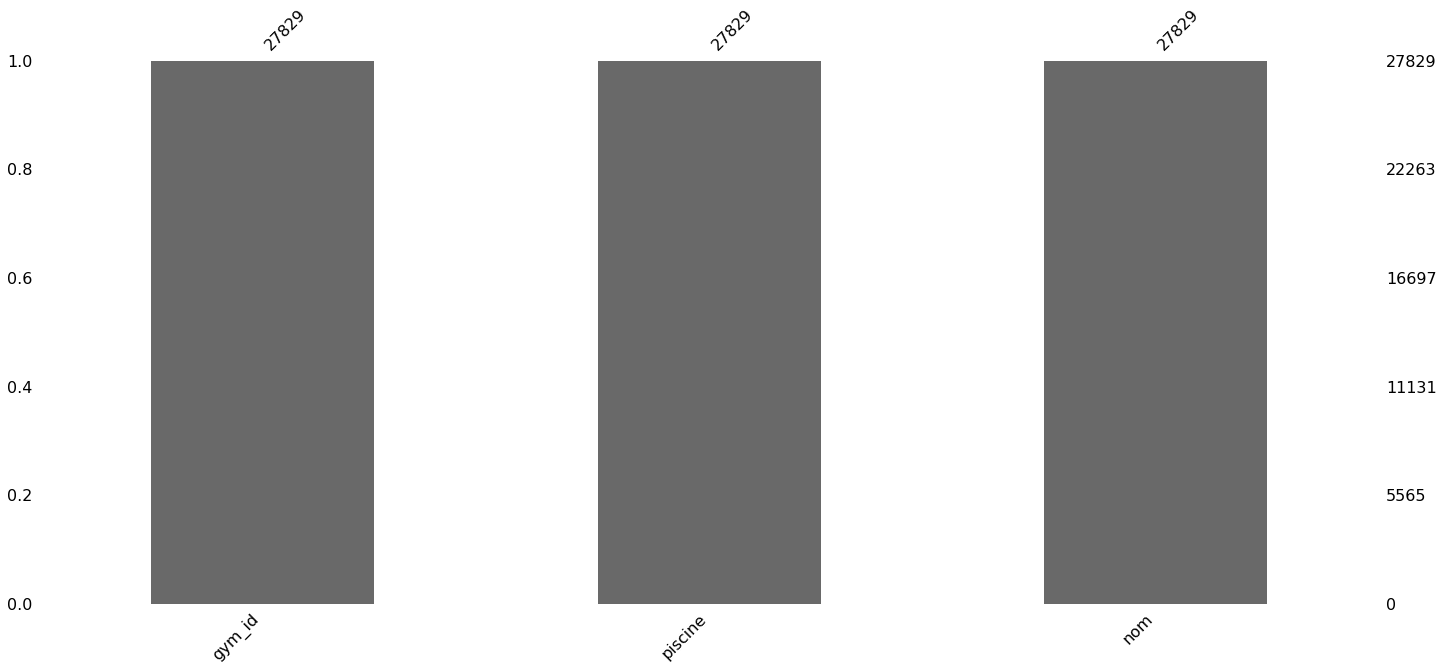

In [144]:
# Le resultat visuel
msno.bar(prestations_q15)

In [145]:
# On export le resultat dans un fichier excel 
prestations_q15.to_excel("Q15.xlsx")

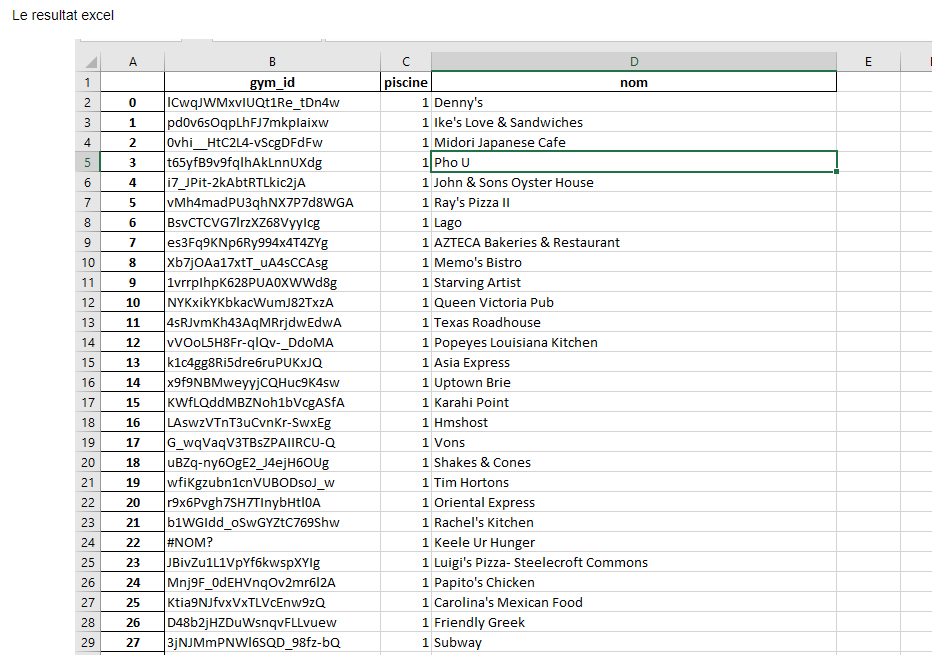

#### Methode 2

Vu qu'on doit travailler avec de booleens dans cet exercice, voici une 2 methode

In [146]:
# Pour ne pas modifier le csv original, on va faire une copie et 
# on va importer seulement les colonnes qu'on a besoin pour repondre a la question.

prestations_q15 = prestations[["gym_id","piscine"]]
    # On extrait les colonnes gym_id et quartier dans une variable
prestations_q15 = prestations_q15.copy(deep=True)
    # On fait une copie. Toute modification des données de la copie ne sera pas reflétée 
    # dans la copie originale (et vice versa).

In [147]:
# Notre DataFrame na pas de NA
prestations_q15.isna().sum()

gym_id     0
piscine    0
dtype: int64

In [148]:
# On verifie si on a de doublons dans la colonne "gym_id"
prestations_q15["gym_id"].duplicated().sum()

435

In [149]:
# On a 33833 valeurs uniques dans la colonne "gym_id"
print(prestations_q15["gym_id"].nunique())

33833


In [150]:
print(prestations_q15["gym_id"].value_counts().sum())

34268


In [151]:
#On efface les doublons
prestations_q15 = prestations_q15.drop_duplicates(subset=["gym_id"])

In [152]:
# On n'a plus de doublons
print(prestations_q15["gym_id"].value_counts().sum())

33833


In [153]:
# On ajoute une autre colonne (si on a une piscine: oui/ si on n'a pas de piscine: non)
prestations_q15['piscine'] = np.where(prestations_q15['piscine']==1, 'oui', 'non')

In [154]:
prestations_q15

,gym_id,piscine
0,lCwqJWMxvIUQt1Re_tDn4w,oui
1,pd0v6sOqpLhFJ7mkpIaixw,oui
2,0vhi__HtC2L4-vScgDFdFw,oui
3,t65yfB9v9fqlhAkLnnUXdg,oui
4,i7_JPit-2kAbtRTLkic2jA,oui
...,...,...
34263,cjZfgcQwA6KmQ_ANWKN2aw,oui
34264,Hq2edcOTjse7wjK2CwBijQ,non
34265,7KlpgRjjAmVabPzxcExs0g,oui
34266,0fY-zYyP2fDmp2YXFsuNTg,oui


In [155]:
# On export notre nouvelle colonne dans le DF caracteristiques
caracteristiques = caracteristiques.merge(prestations_q15.astype(str), how='left', on=['gym_id'])

In [156]:
caracteristiques

,gym_id,moyenne_votes,ville,quartier,nb_gyms_quartier,nb_gyms_meme_annee,nb_opinions,nb_opinions_positives,nb_opinions_negatives,ratio_opinions_positives en %,ratio_opinions_negatives en %,nb_avis_merveilleux,nb_avis_vip,nb_recommendations,nb_appreciations,nb_frequentations,reseau,piscine
0,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,0,0,oui,oui
1,pd0v6sOqpLhFJ7mkpIaixw,4.0,Phoenix,85004,170,1395.0,108.0,92.0,16.0,85.185185,14.814815,42.0,909,16,1,0,oui,oui
2,0vhi__HtC2L4-vScgDFdFw,3.5,Calgary,T2T,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0,157,non,oui
3,t65yfB9v9fqlhAkLnnUXdg,3.5,Toronto,M5A,121,1803.0,36.0,29.0,7.0,80.555556,19.444444,26.0,2,3,0,0,non,oui
4,i7_JPit-2kAbtRTLkic2jA,4.0,Toronto,M5H,96,1803.0,88.0,77.0,11.0,87.500000,12.500000,35.0,473,5,0,0,oui,oui
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34263,cjZfgcQwA6KmQ_ANWKN2aw,3.5,McMurray,15317,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,oui,oui
34264,Hq2edcOTjse7wjK2CwBijQ,3.5,Pointe-Claire,H9S,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,non,non
34265,7KlpgRjjAmVabPzxcExs0g,4.0,Phoenix,85051,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0,32,non,oui
34266,0fY-zYyP2fDmp2YXFsuNTg,4.0,Sun Prairie,53590,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,7,non,oui


# Question 16

𝑠𝑎𝑢𝑛𝑎 : Si la salle de gym dispose d’un sauna (valeur booléenne : 0 ou 1).

In [157]:
# Voir le nom de colonnes du fichier .csv

for col in prestations.columns:
    print(col)

gym_id
piscine
sauna
spa
adapte_pour_enfants
nutritionniste
cout_abonnement
restaurant


In [158]:
# Pour ne pas modifier le csv original, on va faire une copie et 
# on va importer seulement les colonnes qu'on a besoin pour repondre a la question.

prestations_q16 = prestations[["gym_id","sauna"]]
    # On extrait les colonnes gym_id et quartier dans une variable
prestations_q16 = prestations_q16.copy(deep=True)
    # On fait une copie. Toute modification des données de la copie ne sera pas reflétée 
    # dans la copie originale (et vice versa).

In [159]:
# Notre DataFrame na pas de NA
prestations_q16.isna().sum()

gym_id    0
sauna     0
dtype: int64

In [160]:
# On verifie si on a de doublons dans la colonne "gym_id"
prestations_q16["gym_id"].duplicated().sum()

435

In [161]:
# On a 33833 valeurs uniques dans la colonne "gym_id"
print(prestations_q16["gym_id"].nunique())

33833


In [162]:
print(prestations_q16["gym_id"].value_counts().sum())

34268


In [163]:
#On efface les doublons
prestations_q16 = prestations_q16.drop_duplicates(subset=["gym_id"])

In [164]:
# On n'a plus de doublons
print(prestations_q16["gym_id"].value_counts().sum())

33833


In [165]:
# On ajoute une autre colonne (si on a une piscine: oui/ si on n'a pas de piscine: non)
prestations_q16['sauna'] = np.where(prestations_q16['sauna']==1, 'oui', 'non')

In [166]:
# Le resultat qu'on cherche
prestations_q16

,gym_id,sauna
0,lCwqJWMxvIUQt1Re_tDn4w,non
1,pd0v6sOqpLhFJ7mkpIaixw,oui
2,0vhi__HtC2L4-vScgDFdFw,non
3,t65yfB9v9fqlhAkLnnUXdg,oui
4,i7_JPit-2kAbtRTLkic2jA,non
...,...,...
34263,cjZfgcQwA6KmQ_ANWKN2aw,non
34264,Hq2edcOTjse7wjK2CwBijQ,non
34265,7KlpgRjjAmVabPzxcExs0g,non
34266,0fY-zYyP2fDmp2YXFsuNTg,non


In [167]:
# On export notre nouvelle colonne dans le DF caracteristiques
caracteristiques = caracteristiques.merge(prestations_q16.astype(str), how='left', on=['gym_id'])

In [168]:
caracteristiques

,gym_id,moyenne_votes,ville,quartier,nb_gyms_quartier,nb_gyms_meme_annee,nb_opinions,nb_opinions_positives,nb_opinions_negatives,ratio_opinions_positives en %,ratio_opinions_negatives en %,nb_avis_merveilleux,nb_avis_vip,nb_recommendations,nb_appreciations,nb_frequentations,reseau,piscine,sauna
0,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,0,0,oui,oui,non
1,pd0v6sOqpLhFJ7mkpIaixw,4.0,Phoenix,85004,170,1395.0,108.0,92.0,16.0,85.185185,14.814815,42.0,909,16,1,0,oui,oui,oui
2,0vhi__HtC2L4-vScgDFdFw,3.5,Calgary,T2T,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0,157,non,oui,non
3,t65yfB9v9fqlhAkLnnUXdg,3.5,Toronto,M5A,121,1803.0,36.0,29.0,7.0,80.555556,19.444444,26.0,2,3,0,0,non,oui,oui
4,i7_JPit-2kAbtRTLkic2jA,4.0,Toronto,M5H,96,1803.0,88.0,77.0,11.0,87.500000,12.500000,35.0,473,5,0,0,oui,oui,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34263,cjZfgcQwA6KmQ_ANWKN2aw,3.5,McMurray,15317,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,oui,oui,non
34264,Hq2edcOTjse7wjK2CwBijQ,3.5,Pointe-Claire,H9S,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,non,non,non
34265,7KlpgRjjAmVabPzxcExs0g,4.0,Phoenix,85051,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0,32,non,oui,non
34266,0fY-zYyP2fDmp2YXFsuNTg,4.0,Sun Prairie,53590,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,7,non,oui,non


# Question 17

𝑠𝑝𝑎 : Si la salle de gym dispose d’un spa (valeur booléenne : 0 ou 1)

In [169]:
# Voir le nom de colonnes du fichier .csv

for col in prestations.columns:
    print(col)

gym_id
piscine
sauna
spa
adapte_pour_enfants
nutritionniste
cout_abonnement
restaurant


In [170]:
# Pour ne pas modifier le csv original, on va faire une copie et 
# on va importer seulement les colonnes qu'on a besoin pour repondre a la question.

prestations_q17 = prestations[["gym_id","spa"]]
    # On extrait les colonnes gym_id et quartier dans une variable
prestations_q17 = prestations_q17.copy(deep=True)
    # On fait une copie. Toute modification des données de la copie ne sera pas reflétée 
    # dans la copie originale (et vice versa).

In [171]:
# Notre DataFrame na pas de NA
prestations_q17.isna().sum()

gym_id    0
spa       0
dtype: int64

In [172]:
# On verifie si on a de doublons dans la colonne "gym_id"
prestations_q17["gym_id"].duplicated().sum()

435

In [173]:
# On a 33833 valeurs uniques dans la colonne "gym_id"
print(prestations_q17["gym_id"].nunique())

33833


In [174]:
print(prestations_q17["gym_id"].value_counts().sum())

34268


In [175]:
#On efface les doublons
prestations_q17 = prestations_q17.drop_duplicates(subset=["gym_id"])

In [176]:
# On n'a plus de doublons
print(prestations_q17["gym_id"].value_counts().sum())

33833


In [177]:
# On ajoute une autre colonne (si on a une piscine: oui/ si on n'a pas de piscine: non)
prestations_q17['spa'] = np.where(prestations_q17['spa']==1, 'oui', 'non')

In [178]:
prestations_q17

,gym_id,spa
0,lCwqJWMxvIUQt1Re_tDn4w,oui
1,pd0v6sOqpLhFJ7mkpIaixw,oui
2,0vhi__HtC2L4-vScgDFdFw,non
3,t65yfB9v9fqlhAkLnnUXdg,non
4,i7_JPit-2kAbtRTLkic2jA,oui
...,...,...
34263,cjZfgcQwA6KmQ_ANWKN2aw,oui
34264,Hq2edcOTjse7wjK2CwBijQ,non
34265,7KlpgRjjAmVabPzxcExs0g,oui
34266,0fY-zYyP2fDmp2YXFsuNTg,oui


In [179]:
# On export notre nouvelle colonne dans le DF caracteristiques
caracteristiques = caracteristiques.merge(prestations_q17.astype(str), how='left', on=['gym_id'])

In [180]:
caracteristiques

,gym_id,moyenne_votes,ville,quartier,nb_gyms_quartier,nb_gyms_meme_annee,nb_opinions,nb_opinions_positives,nb_opinions_negatives,ratio_opinions_positives en %,ratio_opinions_negatives en %,nb_avis_merveilleux,nb_avis_vip,nb_recommendations,nb_appreciations,nb_frequentations,reseau,piscine,sauna,spa
0,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,0,0,oui,oui,non,oui
1,pd0v6sOqpLhFJ7mkpIaixw,4.0,Phoenix,85004,170,1395.0,108.0,92.0,16.0,85.185185,14.814815,42.0,909,16,1,0,oui,oui,oui,oui
2,0vhi__HtC2L4-vScgDFdFw,3.5,Calgary,T2T,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0,157,non,oui,non,non
3,t65yfB9v9fqlhAkLnnUXdg,3.5,Toronto,M5A,121,1803.0,36.0,29.0,7.0,80.555556,19.444444,26.0,2,3,0,0,non,oui,oui,non
4,i7_JPit-2kAbtRTLkic2jA,4.0,Toronto,M5H,96,1803.0,88.0,77.0,11.0,87.500000,12.500000,35.0,473,5,0,0,oui,oui,non,oui
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34263,cjZfgcQwA6KmQ_ANWKN2aw,3.5,McMurray,15317,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0,oui,oui,non,oui
34264,Hq2edcOTjse7wjK2CwBijQ,3.5,Pointe-Claire,H9S,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,non,non,non,non
34265,7KlpgRjjAmVabPzxcExs0g,4.0,Phoenix,85051,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0,32,non,oui,non,oui
34266,0fY-zYyP2fDmp2YXFsuNTg,4.0,Sun Prairie,53590,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,7,non,oui,non,oui


# Question 18

𝑎𝑑𝑎𝑝𝑡𝑒_𝑝𝑜𝑢𝑟_𝑒𝑛𝑓𝑎𝑛𝑡𝑠 : Si le gym est approprié pour les enfants (valeur booléenne : 0 ou 1)

In [181]:
# Voir le nom de colonnes du fichier .csv

for col in prestations.columns:
    print(col)

gym_id
piscine
sauna
spa
adapte_pour_enfants
nutritionniste
cout_abonnement
restaurant


In [182]:
# Pour ne pas modifier le csv original, on va faire une copie et 
# on va importer seulement les colonnes qu'on a besoin pour repondre a la question.

prestations_q18 = prestations[["gym_id","adapte_pour_enfants"]]
    # On extrait les colonnes gym_id et quartier dans une variable
prestations_q18 = prestations_q18.copy(deep=True)
    # On fait une copie. Toute modification des données de la copie ne sera pas reflétée 
    # dans la copie originale (et vice versa).

In [183]:
# Notre DataFrame na pas de NA
prestations_q18.isna().sum()

gym_id                 0
adapte_pour_enfants    0
dtype: int64

In [184]:
# On verifie si on a de doublons dans la colonne "gym_id"
prestations_q18["gym_id"].duplicated().sum()

435

In [185]:
# On a 33833 valeurs uniques dans la colonne "gym_id"
print(prestations_q18["gym_id"].nunique())

33833


In [186]:
print(prestations_q18["gym_id"].value_counts().sum())

34268


In [187]:
#On efface les doublons
prestations_q18 = prestations_q18.drop_duplicates(subset=["gym_id"])

In [188]:
# On n'a plus de doublons
print(prestations_q18["gym_id"].value_counts().sum())

33833


In [189]:
# On ajoute une autre colonne (si on a une piscine: oui/ si on n'a pas de piscine: non)
prestations_q18["adapte_pour_enfants"] = np.where(prestations_q18["adapte_pour_enfants"]==1, 'oui', 'non')

In [190]:
# Le resultat qu'on cherche
prestations_q18

,gym_id,adapte_pour_enfants
0,lCwqJWMxvIUQt1Re_tDn4w,oui
1,pd0v6sOqpLhFJ7mkpIaixw,oui
2,0vhi__HtC2L4-vScgDFdFw,oui
3,t65yfB9v9fqlhAkLnnUXdg,oui
4,i7_JPit-2kAbtRTLkic2jA,non
...,...,...
34263,cjZfgcQwA6KmQ_ANWKN2aw,oui
34264,Hq2edcOTjse7wjK2CwBijQ,oui
34265,7KlpgRjjAmVabPzxcExs0g,oui
34266,0fY-zYyP2fDmp2YXFsuNTg,oui


In [191]:
# On export notre nouvelle colonne dans le DF caracteristiques
caracteristiques = caracteristiques.merge(prestations_q18.astype(str), how='left', on=['gym_id'])

In [192]:
caracteristiques

,gym_id,moyenne_votes,ville,quartier,nb_gyms_quartier,nb_gyms_meme_annee,nb_opinions,nb_opinions_positives,nb_opinions_negatives,ratio_opinions_positives en %,...,nb_avis_merveilleux,nb_avis_vip,nb_recommendations,nb_appreciations,nb_frequentations,reseau,piscine,sauna,spa,adapte_pour_enfants
0,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,49,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,20,0,0,oui,oui,non,oui,oui
1,pd0v6sOqpLhFJ7mkpIaixw,4.0,Phoenix,85004,170,1395.0,108.0,92.0,16.0,85.185185,...,42.0,909,16,1,0,oui,oui,oui,oui,oui
2,0vhi__HtC2L4-vScgDFdFw,3.5,Calgary,T2T,77,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9,0,157,non,oui,non,non,oui
3,t65yfB9v9fqlhAkLnnUXdg,3.5,Toronto,M5A,121,1803.0,36.0,29.0,7.0,80.555556,...,26.0,2,3,0,0,non,oui,oui,non,oui
4,i7_JPit-2kAbtRTLkic2jA,4.0,Toronto,M5H,96,1803.0,88.0,77.0,11.0,87.500000,...,35.0,473,5,0,0,oui,oui,non,oui,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34263,cjZfgcQwA6KmQ_ANWKN2aw,3.5,McMurray,15317,53,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4,0,0,oui,oui,non,oui,oui
34264,Hq2edcOTjse7wjK2CwBijQ,3.5,Pointe-Claire,H9S,20,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,0,0,non,non,non,non,oui
34265,7KlpgRjjAmVabPzxcExs0g,4.0,Phoenix,85051,71,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,9,0,32,non,oui,non,oui,oui
34266,0fY-zYyP2fDmp2YXFsuNTg,4.0,Sun Prairie,53590,48,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3,0,7,non,oui,non,oui,oui


# Question 19

𝑛𝑢𝑡𝑟𝑖𝑡𝑖𝑜𝑛𝑛𝑖𝑠𝑡𝑒 : Si la salle de gym offre des services de nutrition (valeur booléenne : 0 ou 1).

In [193]:
# Voir le nom de colonnes du fichier .csv

for col in prestations.columns:
    print(col)

gym_id
piscine
sauna
spa
adapte_pour_enfants
nutritionniste
cout_abonnement
restaurant


In [194]:
# Pour ne pas modifier le csv original, on va faire une copie et 
# on va importer seulement les colonnes qu'on a besoin pour repondre a la question.

prestations_q19 = prestations[["gym_id","nutritionniste"]]
    # On extrait les colonnes gym_id et quartier dans une variable
prestations_q19 = prestations_q19.copy(deep=True)
    # On fait une copie. Toute modification des données de la copie ne sera pas reflétée 
    # dans la copie originale (et vice versa).

In [195]:
# Notre DataFrame na pas de NA
prestations_q19.isna().sum()

gym_id            0
nutritionniste    0
dtype: int64

In [196]:
# On verifie si on a de doublons dans la colonne "gym_id"
prestations_q19["gym_id"].duplicated().sum()

435

In [197]:
# On a 33833 valeurs uniques dans la colonne "gym_id"
print(prestations_q19["gym_id"].nunique())

33833


In [198]:
print(prestations_q19["gym_id"].value_counts().sum())

34268


In [199]:
#On efface les doublons
prestations_q19 = prestations_q19.drop_duplicates(subset=["gym_id"])

In [200]:
# On n'a plus de doublons
print(prestations_q19["gym_id"].value_counts().sum())

33833


In [201]:
# On ajoute une autre colonne (si on a une piscine: oui/ si on n'a pas de piscine: non)
prestations_q19['nutritionniste'] = np.where(prestations_q19['nutritionniste']==1, 'oui', 'non')

In [202]:
# Le resultat qu'on cherche
prestations_q19

,gym_id,nutritionniste
0,lCwqJWMxvIUQt1Re_tDn4w,non
1,pd0v6sOqpLhFJ7mkpIaixw,non
2,0vhi__HtC2L4-vScgDFdFw,oui
3,t65yfB9v9fqlhAkLnnUXdg,oui
4,i7_JPit-2kAbtRTLkic2jA,oui
...,...,...
34263,cjZfgcQwA6KmQ_ANWKN2aw,non
34264,Hq2edcOTjse7wjK2CwBijQ,oui
34265,7KlpgRjjAmVabPzxcExs0g,non
34266,0fY-zYyP2fDmp2YXFsuNTg,non


In [203]:
# On export notre nouvelle colonne dans le DF caracteristiques
caracteristiques = caracteristiques.merge(prestations_q19.astype(str), how='left', on=['gym_id'])

In [204]:
caracteristiques

,gym_id,moyenne_votes,ville,quartier,nb_gyms_quartier,nb_gyms_meme_annee,nb_opinions,nb_opinions_positives,nb_opinions_negatives,ratio_opinions_positives en %,...,nb_avis_vip,nb_recommendations,nb_appreciations,nb_frequentations,reseau,piscine,sauna,spa,adapte_pour_enfants,nutritionniste
0,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,49,NaN,NaN,NaN,NaN,NaN,...,NaN,20,0,0,oui,oui,non,oui,oui,non
1,pd0v6sOqpLhFJ7mkpIaixw,4.0,Phoenix,85004,170,1395.0,108.0,92.0,16.0,85.185185,...,909,16,1,0,oui,oui,oui,oui,oui,non
2,0vhi__HtC2L4-vScgDFdFw,3.5,Calgary,T2T,77,NaN,NaN,NaN,NaN,NaN,...,NaN,9,0,157,non,oui,non,non,oui,oui
3,t65yfB9v9fqlhAkLnnUXdg,3.5,Toronto,M5A,121,1803.0,36.0,29.0,7.0,80.555556,...,2,3,0,0,non,oui,oui,non,oui,oui
4,i7_JPit-2kAbtRTLkic2jA,4.0,Toronto,M5H,96,1803.0,88.0,77.0,11.0,87.500000,...,473,5,0,0,oui,oui,non,oui,non,oui
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34263,cjZfgcQwA6KmQ_ANWKN2aw,3.5,McMurray,15317,53,NaN,NaN,NaN,NaN,NaN,...,NaN,4,0,0,oui,oui,non,oui,oui,non
34264,Hq2edcOTjse7wjK2CwBijQ,3.5,Pointe-Claire,H9S,20,NaN,NaN,NaN,NaN,NaN,...,NaN,1,0,0,non,non,non,non,oui,oui
34265,7KlpgRjjAmVabPzxcExs0g,4.0,Phoenix,85051,71,NaN,NaN,NaN,NaN,NaN,...,NaN,9,0,32,non,oui,non,oui,oui,non
34266,0fY-zYyP2fDmp2YXFsuNTg,4.0,Sun Prairie,53590,48,NaN,NaN,NaN,NaN,NaN,...,NaN,3,0,7,non,oui,non,oui,oui,non


# Question 20

𝑐𝑜𝑢𝑡_𝑎𝑏𝑜𝑛𝑛𝑒𝑚𝑒𝑛𝑡 : Le niveau de prix du gym. Il existe trois niveaux, 1 (pas cher), 2 (moyen) et 3 (cher).

In [205]:
# Voir le nom de colonnes du fichier .csv
for col in prestations.columns:
    print(col)

gym_id
piscine
sauna
spa
adapte_pour_enfants
nutritionniste
cout_abonnement
restaurant


In [206]:
# Pour ne pas modifier le csv original, on va faire une copie et 
# on va importer seulement les colonnes qu'on a besoin pour repondre a la question.
prestations_q20 = prestations[["gym_id","cout_abonnement"]]
    # On extrait les colonnes gym_id et quartier dans une variable
prestations_q20 = prestations_q20.copy(deep=True)
    # On fait une copie. Toute modification des données de la copie ne sera pas reflétée 
    # dans la copie originale (et vice versa).

In [207]:
# On va essayer une autre methone pour ne pas se repeter
# On va creer une fonction 
def fonct20(row):
    if row["cout_abonnement"] == 1:
        val = 'pas cher'
    elif row["cout_abonnement"] == 2:
        val = 'moyen'
    else:
        val= 'cher'
    return val

In [208]:
prestations_q20["cout_abonnement"] = prestations_q20.apply(fonct20, axis=1)

In [209]:
prestations_q20

,gym_id,cout_abonnement
0,lCwqJWMxvIUQt1Re_tDn4w,moyen
1,pd0v6sOqpLhFJ7mkpIaixw,moyen
2,0vhi__HtC2L4-vScgDFdFw,moyen
3,t65yfB9v9fqlhAkLnnUXdg,pas cher
4,i7_JPit-2kAbtRTLkic2jA,cher
...,...,...
34263,cjZfgcQwA6KmQ_ANWKN2aw,pas cher
34264,Hq2edcOTjse7wjK2CwBijQ,moyen
34265,7KlpgRjjAmVabPzxcExs0g,pas cher
34266,0fY-zYyP2fDmp2YXFsuNTg,pas cher


In [210]:
# On export notre nouvelle colonne dans le DF caracteristiques
caracteristiques = caracteristiques.merge(prestations_q20.astype(str), how='left', on=['gym_id'])

In [211]:
caracteristiques

,gym_id,moyenne_votes,ville,quartier,nb_gyms_quartier,nb_gyms_meme_annee,nb_opinions,nb_opinions_positives,nb_opinions_negatives,ratio_opinions_positives en %,...,nb_recommendations,nb_appreciations,nb_frequentations,reseau,piscine,sauna,spa,adapte_pour_enfants,nutritionniste,cout_abonnement
0,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,49,NaN,NaN,NaN,NaN,NaN,...,20,0,0,oui,oui,non,oui,oui,non,moyen
1,pd0v6sOqpLhFJ7mkpIaixw,4.0,Phoenix,85004,170,1395.0,108.0,92.0,16.0,85.185185,...,16,1,0,oui,oui,oui,oui,oui,non,moyen
2,0vhi__HtC2L4-vScgDFdFw,3.5,Calgary,T2T,77,NaN,NaN,NaN,NaN,NaN,...,9,0,157,non,oui,non,non,oui,oui,moyen
3,t65yfB9v9fqlhAkLnnUXdg,3.5,Toronto,M5A,121,1803.0,36.0,29.0,7.0,80.555556,...,3,0,0,non,oui,oui,non,oui,oui,pas cher
4,i7_JPit-2kAbtRTLkic2jA,4.0,Toronto,M5H,96,1803.0,88.0,77.0,11.0,87.500000,...,5,0,0,oui,oui,non,oui,non,oui,cher
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223923,cjZfgcQwA6KmQ_ANWKN2aw,3.5,McMurray,15317,53,NaN,NaN,NaN,NaN,NaN,...,4,0,0,oui,oui,non,oui,oui,non,pas cher
223924,Hq2edcOTjse7wjK2CwBijQ,3.5,Pointe-Claire,H9S,20,NaN,NaN,NaN,NaN,NaN,...,1,0,0,non,non,non,non,oui,oui,moyen
223925,7KlpgRjjAmVabPzxcExs0g,4.0,Phoenix,85051,71,NaN,NaN,NaN,NaN,NaN,...,9,0,32,non,oui,non,oui,oui,non,pas cher
223926,0fY-zYyP2fDmp2YXFsuNTg,4.0,Sun Prairie,53590,48,NaN,NaN,NaN,NaN,NaN,...,3,0,7,non,oui,non,oui,oui,non,pas cher


# Question 21

**Si la salle de gym dispose d’un restaurant (valeur booléenne : 0 ou 1).**

In [212]:
# Voir le nom de colonnes du fichier .csv

for col in prestations.columns:
    print(col)

gym_id
piscine
sauna
spa
adapte_pour_enfants
nutritionniste
cout_abonnement
restaurant


In [213]:
# Pour ne pas modifier le csv original, on va faire une copie et 
# on va importer seulement les colonnes qu'on a besoin pour repondre a la question.

prestations_q21 = prestations[["gym_id","restaurant"]]
    # On extrait les colonnes gym_id et quartier dans une variable
prestations_q21 = prestations_q21.copy(deep=True)
    # On fait une copie. Toute modification des données de la copie ne sera pas reflétée 
    # dans la copie originale (et vice versa).

In [214]:
# Notre DataFrame na pas de NA
prestations_q21.isna().sum()

gym_id        0
restaurant    0
dtype: int64

In [215]:
# On verifie si on a de doublons dans la colonne "gym_id"
prestations_q21["gym_id"].duplicated().sum()

435

In [216]:
# On a 33833 valeurs uniques dans la colonne "gym_id"
print(prestations_q21["gym_id"].nunique())

33833


In [217]:
print(prestations_q21["gym_id"].value_counts().sum())

34268


In [218]:
#On efface les doublons
prestations_q21 = prestations_q21.drop_duplicates(subset=["gym_id"])

In [219]:
# On n'a plus de doublons
print(prestations_q21["gym_id"].value_counts().sum())

33833


In [220]:
# On ajoute une autre colonne (si on a une piscine: oui/ si on n'a pas de piscine: non)
prestations_q21['restaurant'] = np.where(prestations_q21['restaurant']==1, 'oui', 'non')

In [221]:
# Le resultat qu'on cherche
prestations_q21

,gym_id,restaurant
0,lCwqJWMxvIUQt1Re_tDn4w,non
1,pd0v6sOqpLhFJ7mkpIaixw,oui
2,0vhi__HtC2L4-vScgDFdFw,oui
3,t65yfB9v9fqlhAkLnnUXdg,non
4,i7_JPit-2kAbtRTLkic2jA,non
...,...,...
34263,cjZfgcQwA6KmQ_ANWKN2aw,non
34264,Hq2edcOTjse7wjK2CwBijQ,oui
34265,7KlpgRjjAmVabPzxcExs0g,non
34266,0fY-zYyP2fDmp2YXFsuNTg,non


In [222]:
# On export notre nouvelle colonne dans le DF caracteristiques
caracteristiques = caracteristiques.merge(prestations_q21.astype(str), how='left', on=['gym_id'])

In [223]:
caracteristiques

,gym_id,moyenne_votes,ville,quartier,nb_gyms_quartier,nb_gyms_meme_annee,nb_opinions,nb_opinions_positives,nb_opinions_negatives,ratio_opinions_positives en %,...,nb_appreciations,nb_frequentations,reseau,piscine,sauna,spa,adapte_pour_enfants,nutritionniste,cout_abonnement,restaurant
0,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,49,NaN,NaN,NaN,NaN,NaN,...,0,0,oui,oui,non,oui,oui,non,moyen,non
1,pd0v6sOqpLhFJ7mkpIaixw,4.0,Phoenix,85004,170,1395.0,108.0,92.0,16.0,85.185185,...,1,0,oui,oui,oui,oui,oui,non,moyen,oui
2,0vhi__HtC2L4-vScgDFdFw,3.5,Calgary,T2T,77,NaN,NaN,NaN,NaN,NaN,...,0,157,non,oui,non,non,oui,oui,moyen,oui
3,t65yfB9v9fqlhAkLnnUXdg,3.5,Toronto,M5A,121,1803.0,36.0,29.0,7.0,80.555556,...,0,0,non,oui,oui,non,oui,oui,pas cher,non
4,i7_JPit-2kAbtRTLkic2jA,4.0,Toronto,M5H,96,1803.0,88.0,77.0,11.0,87.500000,...,0,0,oui,oui,non,oui,non,oui,cher,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223923,cjZfgcQwA6KmQ_ANWKN2aw,3.5,McMurray,15317,53,NaN,NaN,NaN,NaN,NaN,...,0,0,oui,oui,non,oui,oui,non,pas cher,non
223924,Hq2edcOTjse7wjK2CwBijQ,3.5,Pointe-Claire,H9S,20,NaN,NaN,NaN,NaN,NaN,...,0,0,non,non,non,non,oui,oui,moyen,oui
223925,7KlpgRjjAmVabPzxcExs0g,4.0,Phoenix,85051,71,NaN,NaN,NaN,NaN,NaN,...,0,32,non,oui,non,oui,oui,non,pas cher,non
223926,0fY-zYyP2fDmp2YXFsuNTg,4.0,Sun Prairie,53590,48,NaN,NaN,NaN,NaN,NaN,...,0,7,non,oui,non,oui,oui,non,pas cher,non


# Preparation pour exportation de notre CSV

In [224]:
# On efface les doublons
caracteristiques = caracteristiques.drop_duplicates(subset=["gym_id"])

In [225]:
caracteristiques.dtypes # On cherche a savoir le type de données

gym_id                            object
moyenne_votes                    float64
ville                             object
quartier                          object
nb_gyms_quartier                  object
nb_gyms_meme_annee               float64
nb_opinions                      float64
nb_opinions_positives            float64
nb_opinions_negatives            float64
ratio_opinions_positives en %    float64
ratio_opinions_negatives en %    float64
nb_avis_merveilleux              float64
nb_avis_vip                       object
nb_recommendations                object
nb_appreciations                  object
nb_frequentations                 object
reseau                            object
piscine                           object
sauna                             object
spa                               object
adapte_pour_enfants               object
nutritionniste                    object
cout_abonnement                   object
restaurant                        object
dtype: object

In [226]:
# On arrondi les decimals de notre dataframe a 2 decimales
caracteristiques = caracteristiques.round(2)

In [227]:
caracteristiques

,gym_id,moyenne_votes,ville,quartier,nb_gyms_quartier,nb_gyms_meme_annee,nb_opinions,nb_opinions_positives,nb_opinions_negatives,ratio_opinions_positives en %,...,nb_appreciations,nb_frequentations,reseau,piscine,sauna,spa,adapte_pour_enfants,nutritionniste,cout_abonnement,restaurant
0,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,49,NaN,NaN,NaN,NaN,NaN,...,0,0,oui,oui,non,oui,oui,non,moyen,non
1,pd0v6sOqpLhFJ7mkpIaixw,4.0,Phoenix,85004,170,1395.0,108.0,92.0,16.0,85.19,...,1,0,oui,oui,oui,oui,oui,non,moyen,oui
2,0vhi__HtC2L4-vScgDFdFw,3.5,Calgary,T2T,77,NaN,NaN,NaN,NaN,NaN,...,0,157,non,oui,non,non,oui,oui,moyen,oui
3,t65yfB9v9fqlhAkLnnUXdg,3.5,Toronto,M5A,121,1803.0,36.0,29.0,7.0,80.56,...,0,0,non,oui,oui,non,oui,oui,pas cher,non
4,i7_JPit-2kAbtRTLkic2jA,4.0,Toronto,M5H,96,1803.0,88.0,77.0,11.0,87.50,...,0,0,oui,oui,non,oui,non,oui,cher,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223923,cjZfgcQwA6KmQ_ANWKN2aw,3.5,McMurray,15317,53,NaN,NaN,NaN,NaN,NaN,...,0,0,oui,oui,non,oui,oui,non,pas cher,non
223924,Hq2edcOTjse7wjK2CwBijQ,3.5,Pointe-Claire,H9S,20,NaN,NaN,NaN,NaN,NaN,...,0,0,non,non,non,non,oui,oui,moyen,oui
223925,7KlpgRjjAmVabPzxcExs0g,4.0,Phoenix,85051,71,NaN,NaN,NaN,NaN,NaN,...,0,32,non,oui,non,oui,oui,non,pas cher,non
223926,0fY-zYyP2fDmp2YXFsuNTg,4.0,Sun Prairie,53590,48,NaN,NaN,NaN,NaN,NaN,...,0,7,non,oui,non,oui,oui,non,pas cher,non


In [228]:
# On remplace tous les NAN avec des 0
caracteristiques.fillna(0)

,gym_id,moyenne_votes,ville,quartier,nb_gyms_quartier,nb_gyms_meme_annee,nb_opinions,nb_opinions_positives,nb_opinions_negatives,ratio_opinions_positives en %,...,nb_appreciations,nb_frequentations,reseau,piscine,sauna,spa,adapte_pour_enfants,nutritionniste,cout_abonnement,restaurant
0,lCwqJWMxvIUQt1Re_tDn4w,2.5,Las Vegas,89110,49,0.0,0.0,0.0,0.0,0.00,...,0,0,oui,oui,non,oui,oui,non,moyen,non
1,pd0v6sOqpLhFJ7mkpIaixw,4.0,Phoenix,85004,170,1395.0,108.0,92.0,16.0,85.19,...,1,0,oui,oui,oui,oui,oui,non,moyen,oui
2,0vhi__HtC2L4-vScgDFdFw,3.5,Calgary,T2T,77,0.0,0.0,0.0,0.0,0.00,...,0,157,non,oui,non,non,oui,oui,moyen,oui
3,t65yfB9v9fqlhAkLnnUXdg,3.5,Toronto,M5A,121,1803.0,36.0,29.0,7.0,80.56,...,0,0,non,oui,oui,non,oui,oui,pas cher,non
4,i7_JPit-2kAbtRTLkic2jA,4.0,Toronto,M5H,96,1803.0,88.0,77.0,11.0,87.50,...,0,0,oui,oui,non,oui,non,oui,cher,non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223923,cjZfgcQwA6KmQ_ANWKN2aw,3.5,McMurray,15317,53,0.0,0.0,0.0,0.0,0.00,...,0,0,oui,oui,non,oui,oui,non,pas cher,non
223924,Hq2edcOTjse7wjK2CwBijQ,3.5,Pointe-Claire,H9S,20,0.0,0.0,0.0,0.0,0.00,...,0,0,non,non,non,non,oui,oui,moyen,oui
223925,7KlpgRjjAmVabPzxcExs0g,4.0,Phoenix,85051,71,0.0,0.0,0.0,0.0,0.00,...,0,32,non,oui,non,oui,oui,non,pas cher,non
223926,0fY-zYyP2fDmp2YXFsuNTg,4.0,Sun Prairie,53590,48,0.0,0.0,0.0,0.0,0.00,...,0,7,non,oui,non,oui,oui,non,pas cher,non


In [229]:
# On export le resultat dans un fichier csv 
caracteristiques.to_csv("caracteristique.csv", index = False)

In [230]:
# On export le resultat dans un fichier excel 
caracteristiques.to_excel("caracteristiques.xlsx")

Et voila re resultat Excel

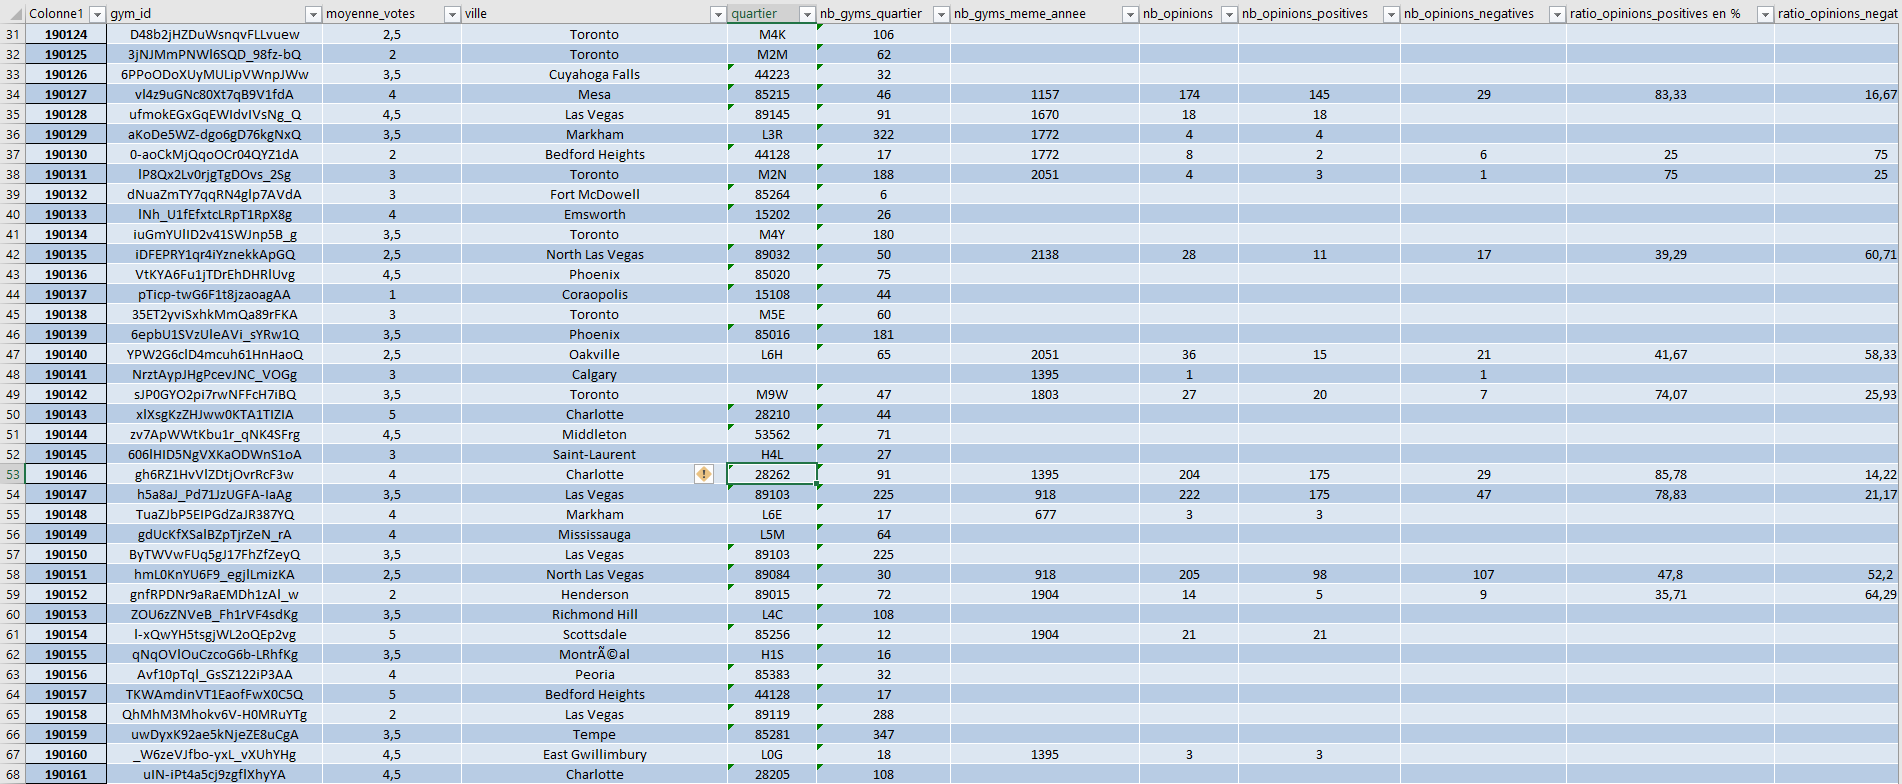

# Question 22

En utilisant la librairie appropriée, resprésenter un histogramme
qui illustre le nombre de gyms pour chaque niveau de prix. 
Il existe trois niveaux, 1 (pas cher), 2 (moyen) et 3 (cher). 
Nommez le cout_abonnement

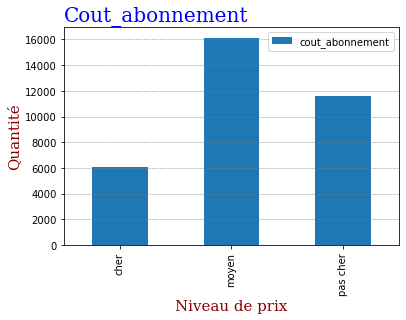

In [231]:
caracteristiques.groupby(["cout_abonnement"]).cout_abonnement.count().plot.bar(legend=True) 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.style.use('bmh')
plt.title("Cout_abonnement",fontdict = font1, loc = 'left') 
plt.xlabel("Niveau de prix",fontdict = font2)    
plt.ylabel("Quantité",fontdict = font2)
plt.grid(color = 'gray', linestyle = '--', axis = 'y', linewidth = 0.5)


plt.show()

# Question 23

En utilisant la librairie appropriée, resprésenter un graphe ou un nuage de points 
qui illustre le nb_recommendations par gym.

In [232]:
caracteristiques["nb_gyms_quartier"] = caracteristiques["nb_gyms_quartier"].fillna(0)

In [233]:
caracteristiques = caracteristiques.astype({"nb_appreciations": int, "nb_gyms_quartier": int, })

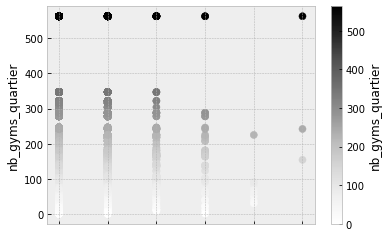

In [234]:
caracteristiques.plot.scatter(x="nb_appreciations", y="nb_gyms_quartier", c="nb_gyms_quartier", s=50);

# Question 24

Représentez dans le même système d'axes deux graphes de votre choix (  par exemples nb_avis_vip par gym + nb_avis_merveilleux par gym) Ajoutez les systèmes d'axes, titres. légendes, etc... 

In [238]:
que24 = caracteristiques[['nb_recommendations', 'nb_frequentations','nb_opinions_positives',\
                          'nb_opinions_negatives','nb_avis_merveilleux','nb_appreciations']].copy()

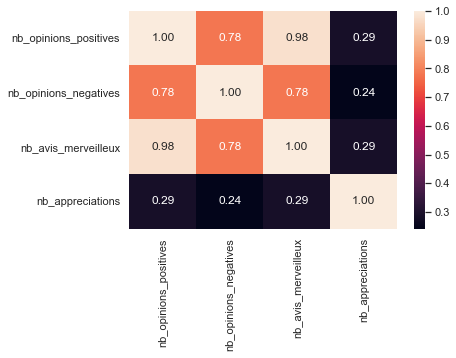

In [239]:
# La correlation entre plusieurs colonnes
sns.heatmap(que24.corr(), annot=True, fmt=".2f")
plt.show()

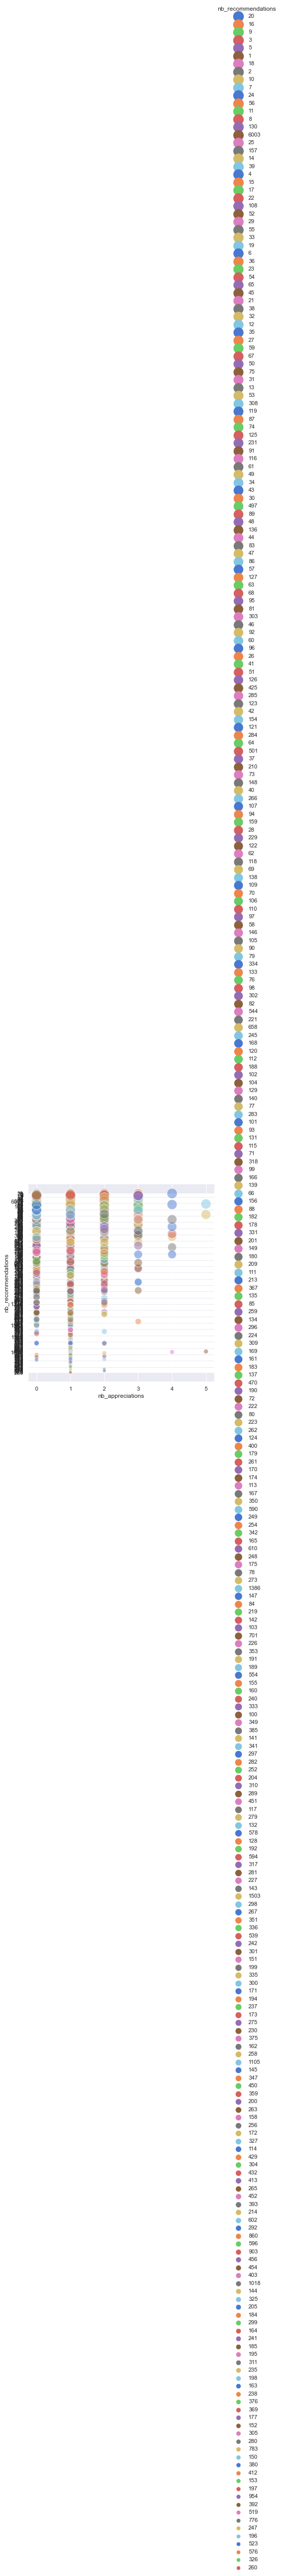

In [245]:
# Le nombre d'appreciations par rapport au nombre de recommandations
sns.relplot(x="nb_appreciations", y="nb_recommendations", hue="nb_recommendations", size="nb_recommendations",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=caracteristiques)